In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#stats
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import textblob
import xgboost

from textblob import TextBlob

C:\Users\Anant\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Anant\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [134]:
df = pd.read_excel("Womens Clothing Reviews Data.xlsx")

In [135]:
df.head(5)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [137]:
df.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [138]:
df.dropna(subset = "Review Text",axis = 0 ,inplace=True)

In [139]:
df.drop(columns = ["Review Title"],inplace = True)

In [140]:
df.isnull().sum()

Product ID         0
Category          13
Subcategory1      13
SubCategory2      13
Location           0
Channel            0
Customer Age       0
Review Text        0
Rating             0
Recommend Flag     0
dtype: int64

In [141]:
df[df["Product ID"].isin(df[df["Category"].isnull()]["Product ID"])].groupby(["Product ID","Category","Subcategory1","SubCategory2"])["Location"].count()

Series([], Name: Location, dtype: int64)

In [142]:
df.dropna(subset = ["Category","Subcategory1","SubCategory2"],axis = 0 ,inplace=True)

In [143]:
df.drop(columns="Product ID",inplace=True)

In [144]:
df.isnull().sum()

Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Review Text       0
Rating            0
Recommend Flag    0
dtype: int64

In [145]:
df.groupby("Location")["Rating"].agg([np.mean,np.min,np.max])

,mean,amin,amax
Location,,,
Bangalore,4.178487,1,5
Chennai,4.186327,1,5
Gurgaon,4.176762,1,5
Mumbai,4.193261,1,5


In [146]:
df.groupby(["Location","Rating"])["Rating"].count()

Location   Rating
Bangalore  1          189
           2          347
           3          626
           4         1098
           5         2788
Chennai    1           72
           2          152
           3          271
           4          535
           5         1208
Gurgaon    1          319
           2          579
           3         1088
           4         1797
           5         4703
Mumbai     1          241
           2          471
           3          838
           4         1478
           5         3828
Name: Rating, dtype: int64

In [147]:
df.groupby(["Category","Subcategory1","SubCategory2"])["Rating"].agg([np.mean,np.min,np.max])

mean  amin  amax
Category       Subcategory1 SubCategory2                        
General        Bottoms      Casual bottoms  4.000000     4     4
                            Jeans           4.333333     1     5
                            Pants           4.228113     1     5
                            Shorts          4.253289     1     5
                            Skirts          4.215652     1     5
               Dresses      Dresses         4.150318     1     5
               Jackets      Jackets         4.240209     1     5
                            Outerwear       4.203320     1     5
               Tops         Blouses         4.138485     1     5
                            Fine gauge      4.199095     1     5
                            Knits           4.123200     1     5
                            Sweaters        4.134259     1     5
               Trend        Trend           3.852632     1     5
General Petite Bottoms      Jeans           4.379310     1     5
                            Pants           4.311688     1     5
                            Skirts          4.253049     1     5
               Dresses      Dresses         4.122328     1     5
               Intimate     Lounge          4.242291     1     5
               Jackets      Jackets         4.350000     1     5
                            Outerwear       4.115385     1     5
               Tops         Blouses         4.150711     1     5
                            Fine gauge      4.303030     1     5
                            Knits           4.192538     1     5
                            Sweaters        4.226744     1     5
               Trend        Trend           3.782609     1     5
Initmates      Intimate     Chemises        4.000000     4     4
                            Intimates       4.278912     1     5
                            Layering        4.348485     1     5
                            Legwear         4.246835     1     5
                            Lounge          4.332579     1     5
                            Sleep           4.294393     1     5
                            Swim            4.171687     1     5

In [148]:
df.groupby(["Category","Rating"])["Rating"].count()

Category        Rating
General         1          479
                2          950
                3         1740
                4         2910
                5         7286
General Petite  1          291
                2          524
                3          929
                4         1702
                5         4391
Initmates       1           51
                2           75
                3          154
                4          296
                5          850
Name: Rating, dtype: int64

In [149]:
df.groupby("Channel")["Rating"].agg([np.mean,np.min,np.max])

,mean,amin,amax
Channel,,,
Mobile,4.200147,1,5
Web,4.170665,1,5


In [150]:
df.groupby(["Channel","Rating"])["Rating"].count()

Channel  Rating
Mobile   1          349
         2          616
         3         1171
         4         2043
         5         5359
Web      1          472
         2          933
         3         1652
         4         2865
         5         7168
Name: Rating, dtype: int64

In [151]:
df["Customer Age"].min()

18

In [152]:
df["Customer Age"].max()

99

In [153]:
df["cuseg"] = np.where(df["Customer Age"]<=30,"young",np.where(df["Customer Age"]<=60,"middle age","old"))

In [154]:
df.groupby("cuseg")["Rating"].agg([np.mean,np.min,np.max])

,mean,amin,amax
cuseg,,,
middle age,4.169280,1,5
old,4.285654,1,5
young,4.180180,1,5


In [155]:
df.Rating.value_counts()

5    12527
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [156]:
df.shape

(22628, 10)

In [157]:
df

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Text,Rating,Recommend Flag,cuseg
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,middle age
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,middle age
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,middle age
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,middle age
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1,middle age
...,...,...,...,...,...,...,...,...,...,...
23481,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,I was very happy to snag this dress at such a ...,5,1,middle age
23482,General Petite,Tops,Knits,Gurgaon,Web,48,"It reminds me of maternity clothes. soft, stre...",3,1,middle age
23483,General Petite,Dresses,Dresses,Gurgaon,Web,31,"This fit well, but the top was very see throug...",3,0,middle age
23484,General,Dresses,Dresses,Gurgaon,Web,28,I bought this dress for a wedding i have this ...,3,1,young


In [158]:
df['sentiment_score1'] =  df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [159]:
df['sentiment1'] = np.where(df.sentiment_score1>0.05,'Positive',np.where(df.sentiment_score1<-0.05, 'Negative', 'Neutral'))

In [160]:
pd.crosstab(df["Rating"], df.sentiment1)

sentiment1,Negative,Neutral,Positive
Rating,,,
1,176,170,475
2,187,273,1089
3,185,382,2256
4,110,361,4437
5,107,422,11998


In [161]:
stop = set(stopwords.words('english'))

#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = text.replace('favorites',"favorite").replace('cons','')
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    text = " ".join(x for x in text.split() if x not in stop)
    return(text)


In [162]:
import string
def pre_process(text):
    text = text.str.replace('/','') #Replacing the / with none
    text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    #text = text.apply(lambda x: str(TextBlob(x).correct()))    #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [163]:
df['reviews'] = df["Review Text"].apply(lambda x: clean_text(x))

In [164]:
df['reviews'] = pre_process(df.reviews)

In [165]:
df['sentiment_score'] =  df["reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [166]:
df['sentiment'] = np.where(df.sentiment_score>0.05,'Positive',np.where(df.sentiment_score<-0.05, 'Negative', 'Neutral'))

In [167]:
df.groupby("cuseg")["sentiment_score"].mean()

cuseg
middle age    0.251802
old           0.256819
young         0.254640
Name: sentiment_score, dtype: float64

In [168]:
df.groupby(["cuseg","sentiment"])["sentiment"].count()

cuseg       sentiment
middle age  Negative       583
            Neutral       1285
            Positive     15157
old         Negative        75
            Neutral        156
            Positive      2153
young       Negative       122
            Neutral        236
            Positive      2861
Name: sentiment, dtype: int64

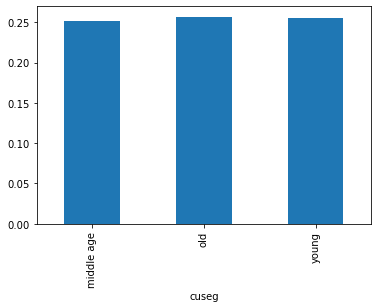

In [169]:
df.groupby("cuseg")["sentiment_score"].mean().plot(kind='bar')

In [170]:
df.groupby("Location")["sentiment_score"].mean()

Location
Bangalore    0.247483
Chennai      0.248573
Gurgaon      0.256746
Mumbai       0.252995
Name: sentiment_score, dtype: float64

In [171]:
df.groupby(["Location","sentiment"])["sentiment"].count()

Location   sentiment
Bangalore  Negative      176
           Neutral       400
           Positive     4472
Chennai    Negative       91
           Neutral       167
           Positive     1980
Gurgaon    Negative      283
           Neutral       616
           Positive     7587
Mumbai     Negative      230
           Neutral       494
           Positive     6132
Name: sentiment, dtype: int64

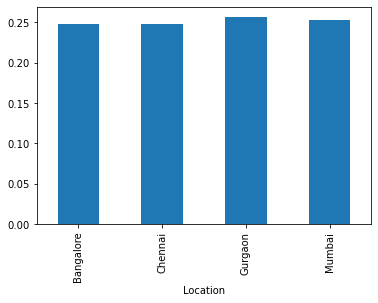

In [172]:
df.groupby("Location")["sentiment_score"].mean().plot(kind='bar')

In [173]:
df.groupby("Channel")["sentiment_score"].mean()

Channel
Mobile    0.255154
Web       0.250972
Name: sentiment_score, dtype: float64

In [174]:
df.groupby(["Channel","sentiment"])["sentiment"].count()

Channel  sentiment
Mobile   Negative       315
         Neutral        696
         Positive      8527
Web      Negative       465
         Neutral        981
         Positive     11644
Name: sentiment, dtype: int64

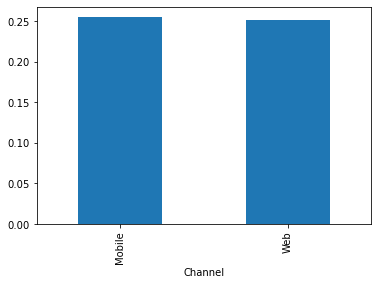

In [175]:
df.groupby("Channel")["sentiment_score"].mean().plot(kind='bar')

In [176]:
df.groupby("Category")["sentiment_score"].mean()

Category
General           0.250338
General Petite    0.256456
Initmates         0.254743
Name: sentiment_score, dtype: float64

In [177]:
df.groupby(["Category","sentiment"])["sentiment"].count()

Category        sentiment
General         Negative       455
                Neutral       1000
                Positive     11910
General Petite  Negative       269
                Neutral        562
                Positive      7006
Initmates       Negative        56
                Neutral        115
                Positive      1255
Name: sentiment, dtype: int64

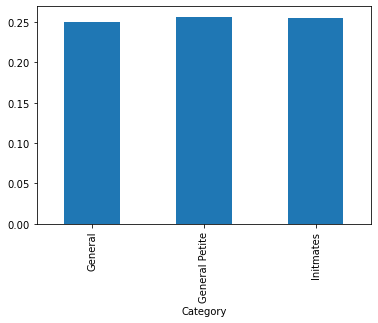

In [178]:
df.groupby("Category")["sentiment_score"].mean().plot(kind='bar')

In [179]:
df.groupby("Subcategory1")["sentiment_score"].mean()

Subcategory1
Bottoms     0.256705
Dresses     0.255330
Intimate    0.252196
Jackets     0.238905
Tops        0.251688
Trend       0.208473
Name: sentiment_score, dtype: float64

In [180]:
df.groupby(["Subcategory1","sentiment"])["sentiment"].count()

Subcategory1  sentiment
Bottoms       Negative      120
              Neutral       266
              Positive     3276
Dresses       Negative      211
              Neutral       447
              Positive     5487
Intimate      Negative       64
              Neutral       139
              Positive     1450
Jackets       Negative       39
              Neutral        94
              Positive      869
Tops          Negative      339
              Neutral       720
              Positive     8989
Trend         Negative        7
              Neutral        11
              Positive      100
Name: sentiment, dtype: int64

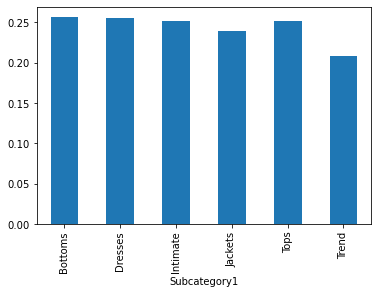

In [181]:
df.groupby("Subcategory1")["sentiment_score"].mean().plot(kind='bar')

In [182]:
df.groupby("SubCategory2")["sentiment_score"].mean()

SubCategory2
Blouses           0.256963
Casual bottoms    0.412500
Chemises          0.600000
Dresses           0.255330
Fine gauge        0.245041
Intimates         0.264159
Jackets           0.242085
Jeans             0.258838
Knits             0.252035
Layering          0.243616
Legwear           0.256399
Lounge            0.243491
Outerwear         0.232094
Pants             0.252057
Shorts            0.251952
Skirts            0.262472
Sleep             0.256843
Sweaters          0.244222
Swim              0.261810
Trend             0.208473
Name: sentiment_score, dtype: float64

In [183]:
Positive_review = df.reviews[df.Rating>=4]
Negative_review = df.reviews[df.Rating<4]

In [184]:
Negative_review

2        high hopes dress really wanted work initially ...
5        love tracy reese dresses one petite feet tall ...
10       dress runs small esp zipper area runs ordered ...
14       nice choice holiday gatherings like length gra...
16       material color nice leg opening large length h...
                               ...                        
23475    cute dress waist high sleeves tight maybe diff...
23478    surprised positive reviews product terrible cu...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked im glad ab...
23484    bought dress wedding summer cute unfortunately...
Name: reviews, Length: 5193, dtype: object

In [185]:
from wordcloud import WordCloud

In [186]:
wordcloud = WordCloud().generate(' '.join(Positive_review.tolist()))

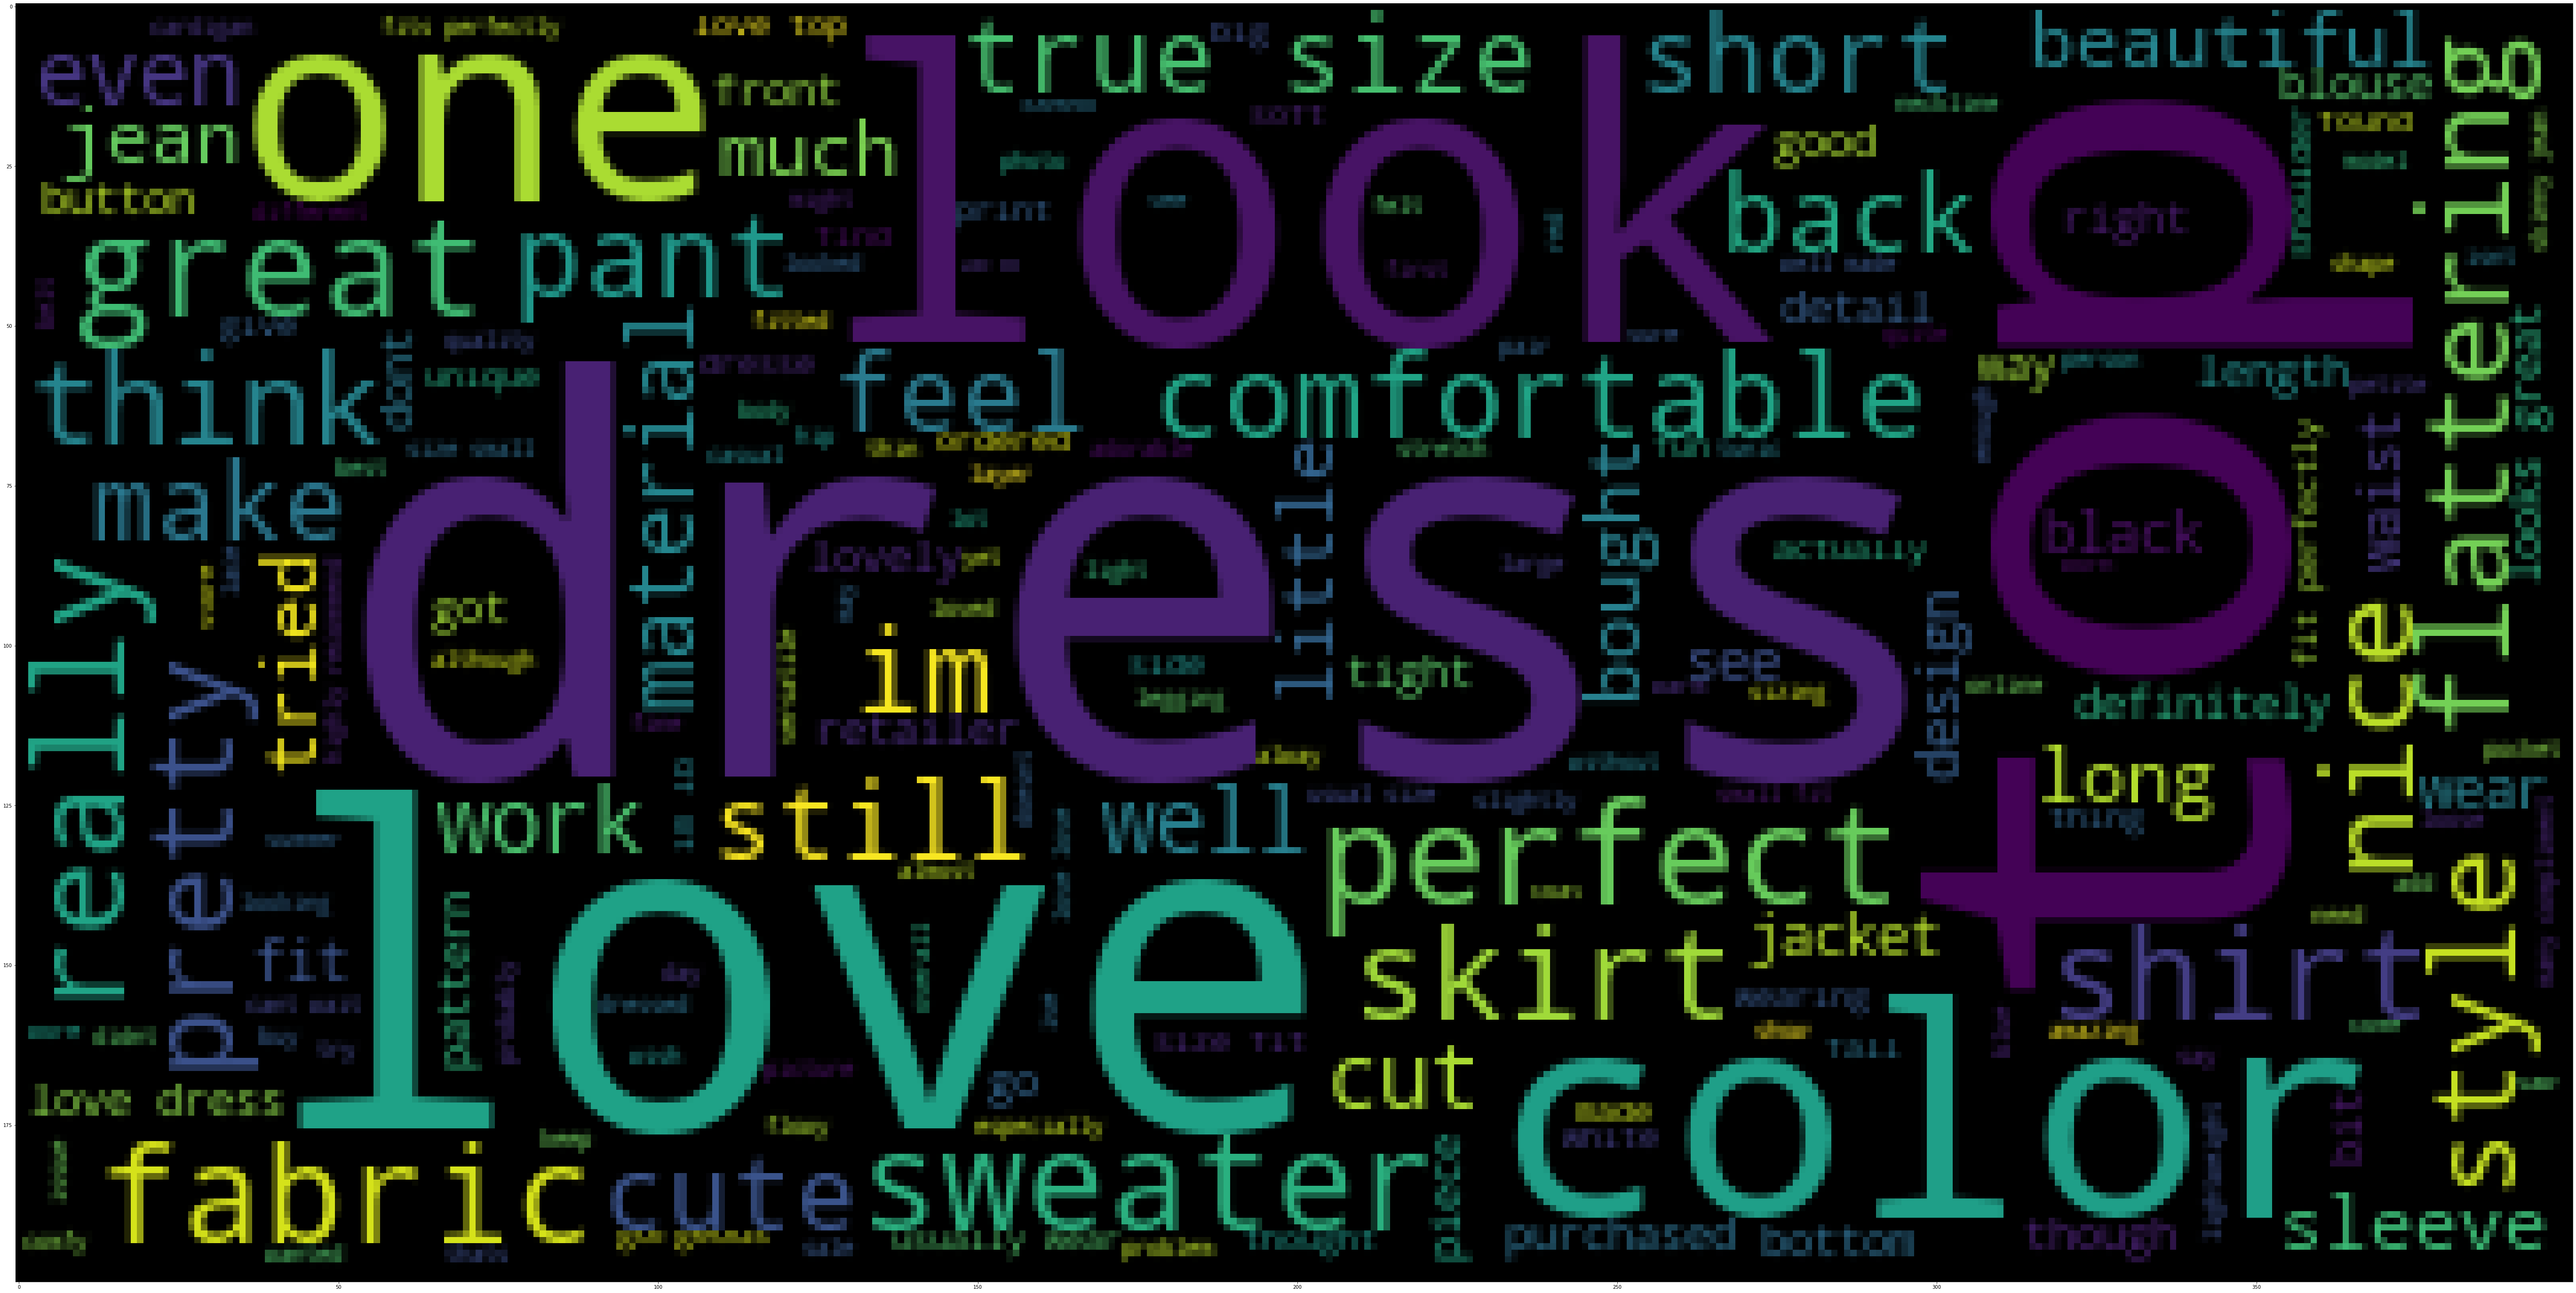

In [187]:
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [188]:
wordcloud = WordCloud().generate(' '.join(Negative_review.tolist()))

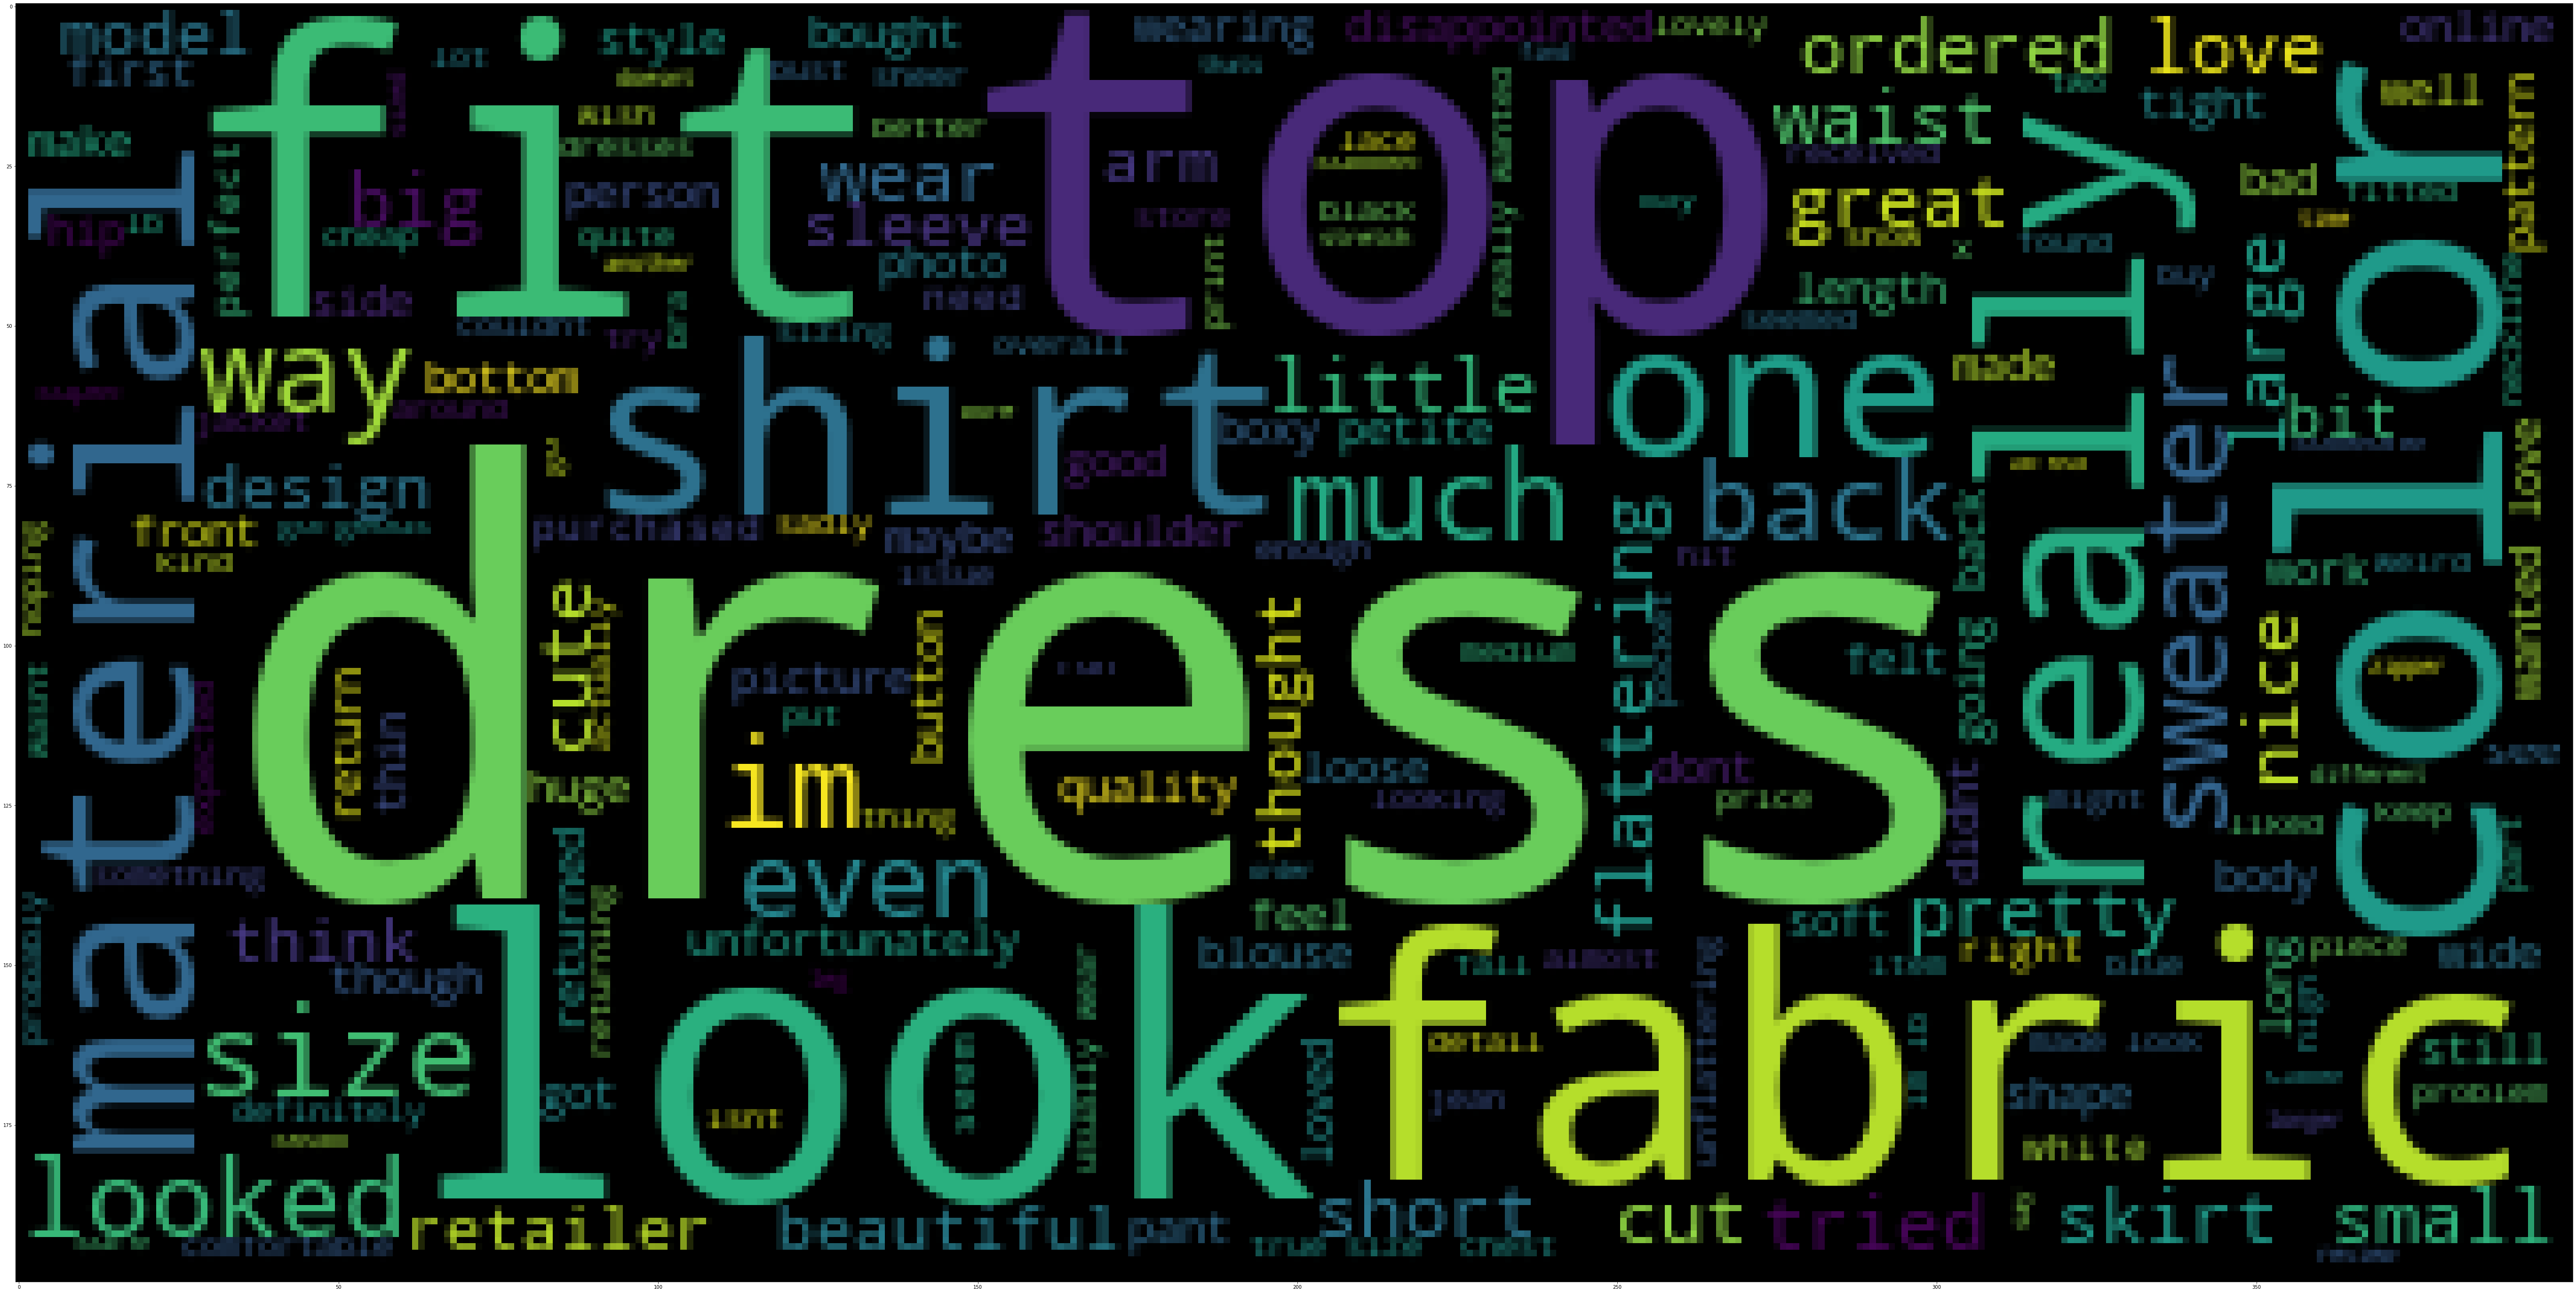

In [189]:
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [190]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=1000)
Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names_out())

In [191]:
Positive_review_dtm

,able,absolutely,across,actually,add,added,addition,adds,adjustable,adorable,...,year,years,yellow,yes,yesterday,yet,youll,youre,zip,zipper
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17431,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)


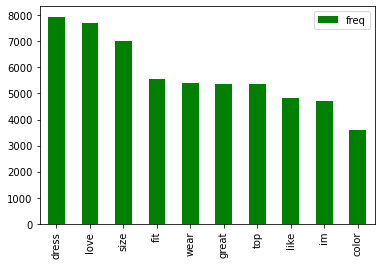

In [193]:
word_freq.head(10).plot(kind='bar', color='Green')

In [194]:
Positive_review_dtm

,able,absolutely,across,actually,add,added,addition,adds,adjustable,adorable,...,year,years,yellow,yes,yesterday,yet,youll,youre,zip,zipper
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17431,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
Positive_review_dtm.T

,0,1,2,3,4,5,6,7,8,9,...,17425,17426,17427,17428,17429,17430,17431,17432,17433,17434
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
across,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
actually,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
add,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youll,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youre,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
zip,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names_out())

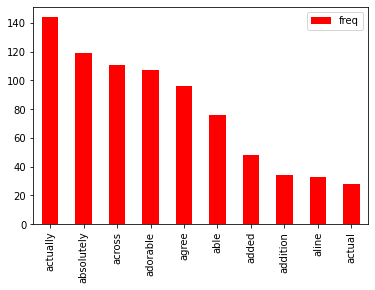

In [197]:
word_freq = pd.DataFrame(Negative_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='red')

In [198]:
x = df.reviews
y = df.Rating

In [199]:
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=123)

In [200]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             max_df=0.9, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)

In [201]:
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [202]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

In [203]:
dtm_tfidf_test

,able,absolutely,across,actually,add,added,addition,adds,adjustable,adorable,...,xxs,year,years,yellow,yes,yesterday,yet,youre,zip,zipper
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.190517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6785,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6786,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6787,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
from sklearn.svm import LinearSVC
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train, train_y)

In [205]:
import sklearn
print(sklearn.metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

print(sklearn.metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           1       0.71      0.40      0.51       576
           2       0.59      0.40      0.48      1115
           3       0.55      0.49      0.52      2023
           4       0.56      0.36      0.44      3363
           5       0.76      0.94      0.84      8762

    accuracy                           0.70     15839
   macro avg       0.63      0.52      0.56     15839
weighted avg       0.68      0.70      0.68     15839

              precision    recall  f1-score   support

           1       0.35      0.19      0.25       245
           2       0.29      0.21      0.24       434
           3       0.39      0.36      0.37       800
           4       0.45      0.26      0.33      1545
           5       0.73      0.92      0.82      3765

    accuracy                           0.63      6789
   macro avg       0.44      0.39      0.40      6789
weighted avg       0.59      0.63      0.60      6789



In [206]:
#inferenc - applying model on new data
r = input()

i hate it very poor quality


In [207]:
clean_r = ' '.join([i for i in clean_text(r).split() if i not in stop ])

In [208]:
clean_r

'hate poor quality'

In [209]:
lsvc_model.predict(tfidf_vect.transform(pd.Series(clean_r)))[0]

C:\Users\Anant\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


1

In [210]:
#Given review - want find most similar reviews - recommendation

from sklearn.metrics.pairwise import cosine_similarity
dist = cosine_similarity(dtm_tfidf_train)

In [211]:
dist = pd.DataFrame(dist, index =  train_X.index, columns = ['d_'+str(i) for i in train_X.index])

In [212]:
dist

,d_3421,d_12481,d_16561,d_22728,d_1887,d_66,d_12848,d_10648,d_20668,d_4821,...,d_21300,d_99,d_23090,d_13940,d_8046,d_15972,d_22426,d_18395,d_16334,d_20718
3421,1.000000,0.000000,0.112231,0.006865,0.034082,0.007438,0.000000,0.035921,0.077646,0.010691,...,0.012960,0.039126,0.068893,0.085857,0.052659,0.000000,0.078771,0.038947,0.107071,0.039051
12481,0.000000,1.000000,0.000000,0.136510,0.092228,0.054376,0.000000,0.074027,0.016078,0.164507,...,0.141606,0.117712,0.032611,0.157963,0.070602,0.000000,0.036494,0.060620,0.026264,0.111617
16561,0.112231,0.000000,1.000000,0.000000,0.000000,0.021038,0.129406,0.064803,0.077110,0.000000,...,0.000000,0.087542,0.090659,0.079936,0.132224,0.000000,0.036655,0.198936,0.000000,0.021788
22728,0.006865,0.136510,0.000000,1.000000,0.031161,0.038685,0.084980,0.039274,0.015000,0.013214,...,0.133209,0.023617,0.020702,0.028416,0.042548,0.032823,0.045256,0.011848,0.014094,0.045992
1887,0.034082,0.092228,0.000000,0.031161,1.000000,0.000000,0.117211,0.100900,0.000000,0.268509,...,0.095901,0.018177,0.000000,0.077557,0.045914,0.000000,0.000000,0.035609,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,0.000000,0.000000,0.000000,0.032823,0.000000,0.019799,0.000000,0.054221,0.013806,0.000000,...,0.047944,0.095852,0.035346,0.000000,0.015810,1.000000,0.051421,0.058074,0.024064,0.000000
22426,0.078771,0.036494,0.036655,0.045256,0.000000,0.128407,0.000000,0.107336,0.021153,0.037333,...,0.047312,0.160152,0.019793,0.097069,0.077882,0.051421,1.000000,0.053230,0.039396,0.022251
18395,0.038947,0.060620,0.198936,0.011848,0.035609,0.042684,0.126474,0.106577,0.074961,0.067480,...,0.041872,0.066135,0.115983,0.241098,0.088284,0.058074,0.053230,1.000000,0.026571,0.053892
16334,0.107071,0.026264,0.000000,0.014094,0.000000,0.120693,0.000000,0.000000,0.000000,0.094304,...,0.052634,0.027631,0.091616,0.260735,0.020767,0.024064,0.039396,0.026571,1.000000,0.056206


In [213]:
top_recs = dist.sort_values(by='d_3421', ascending=False)['d_3421'][1:6] 

<ipython-input-213-6991a36316ab>:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_recs = dist.sort_values(by='d_3421', ascending=False)['d_3421'][1:6]


In [214]:
top_recs.index.values

array([ 5229, 12469, 18125,  5214, 20979], dtype=int64)

In [215]:
top_recs

5229     0.320238
12469    0.313034
18125    0.311205
5214     0.307486
20979    0.287693
Name: d_3421, dtype: float64

In [216]:
train_X[3421]

'got pair petite really like short though even petite length long wish height cuff shorter end folding cuff still looks cute though stitching details nice quality seems good hoping hold fabric seems durable little thick hot summer weather great indoor ac office temperatures going buy another pair full price would c'

In [217]:
train_X[top_recs.index.values]

5229     really love rosepink color pants fit like glov...
12469    great fit waist hips butt wore day stretch tal...
18125    jeans fit well made really high quality denim ...
5214     jeans great however long ordered petite size e...
20979    really great pair pantsleggings idering second...
Name: reviews, dtype: object

In [218]:
#model to predict whihc customers recmmoned

In [219]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             max_df=0.9, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)

In [220]:
tfidf = tfidf_vect.fit_transform(df.reviews)

In [221]:
tfidf1=pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

In [222]:
tfidf1

,able,absolutely,across,actually,add,added,addition,adds,adorable,adore,...,year,years,yellow,yes,yesterday,yet,youll,youre,zip,zipper
0,0.000000,0.384214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190013,0.167227
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22623,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22624,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22625,0.300774,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22626,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [223]:
df.head(3)

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Text,Rating,Recommend Flag,cuseg,sentiment_score1,sentiment1,reviews,sentiment_score,sentiment
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,middle age,0.633333,Positive,absolutely wonderful silky sexy comfortable,0.633333,Positive
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,middle age,0.339583,Positive,love dress sooo pretty happened find store im ...,0.318750,Positive
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,middle age,0.073675,Positive,high hopes dress really wanted work initially ...,0.082300,Positive


In [276]:
df1 = df.drop(columns=["cuseg","sentiment_score1","sentiment","sentiment1","reviews","SubCategory2","Review Text"])

In [277]:
df1.head(3)

,Category,Subcategory1,Location,Channel,Customer Age,Rating,Recommend Flag,sentiment_score
0,Initmates,Intimate,Mumbai,Mobile,33,4,1,0.633333
1,General,Dresses,Bangalore,Mobile,34,5,1,0.318750
2,General,Dresses,Gurgaon,Mobile,60,3,0,0.082300


In [278]:
finaldf1 = pd.get_dummies(df1, columns=['Category',"Subcategory1","Location","Channel"], drop_first=True, prefix=['Category',"Subcategory1","Location","Channel"]) #one hot encoding

In [279]:
finaldf2= pd.concat([finaldf1, tfidf1], axis=1, join='inner')

In [280]:
finaldf2.head()

,Customer Age,Rating,Recommend Flag,sentiment_score,Category_General Petite,Category_Initmates,Subcategory1_Dresses,Subcategory1_Intimate,Subcategory1_Jackets,Subcategory1_Tops,...,year,years,yellow,yes,yesterday,yet,youll,youre,zip,zipper
0,33,4,1,0.633333,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,34,5,1,0.318750,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,60,3,0,0.082300,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190013,0.167227
3,50,5,1,0.500000,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,47,5,1,0.458333,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [282]:
y = finaldf2["Recommend Flag"]

In [283]:
finaldf2 = finaldf2.drop(columns="Recommend Flag")

In [284]:
finaldf2.head(3)

,Customer Age,Rating,sentiment_score,Category_General Petite,Category_Initmates,Subcategory1_Dresses,Subcategory1_Intimate,Subcategory1_Jackets,Subcategory1_Tops,Subcategory1_Trend,...,year,years,yellow,yes,yesterday,yet,youll,youre,zip,zipper
0,33,4,0.633333,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,34,5,0.318750,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,60,3,0.082300,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190013,0.167227


In [285]:
x = finaldf2.copy()

In [286]:
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=123)

In [287]:
from sklearn.svm import LinearSVC
lsvc_model = LinearSVC(C=1.0).fit(train_X, train_y)

C:\Users\Anant\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [289]:
import sklearn
print(sklearn.metrics.classification_report(train_y, lsvc_model.predict(train_X)))

print(sklearn.metrics.classification_report(test_y, lsvc_model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.95      0.70      0.81      2813
           1       0.94      0.99      0.96     12445

    accuracy                           0.94     15258
   macro avg       0.94      0.85      0.89     15258
weighted avg       0.94      0.94      0.93     15258

              precision    recall  f1-score   support

           0       0.88      0.64      0.74      1135
           1       0.93      0.98      0.95      5405

    accuracy                           0.92      6540
   macro avg       0.90      0.81      0.85      6540
weighted avg       0.92      0.92      0.92      6540



In [290]:
#Topic mining using LDA

# Importing Gensim
import gensim
from gensim import corpora

In [295]:
train_X = df.reviews

In [296]:
X_train_tokens = [doc.split() for doc in train_X] 

In [297]:
X_train_tokens

[['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable'],
 ['love',
  'dress',
  'sooo',
  'pretty',
  'happened',
  'find',
  'store',
  'im',
  'glad',
  'bc',
  'never',
  'would',
  'ordered',
  'online',
  'bc',
  'petite',
  'bought',
  'petite',
  'love',
  'length',
  'hits',
  'little',
  'knee',
  'would',
  'definitely',
  'true',
  'midi',
  'someone',
  'truly',
  'petite'],
 ['high',
  'hopes',
  'dress',
  'really',
  'wanted',
  'work',
  'initially',
  'ordered',
  'petite',
  'small',
  'usual',
  'size',
  'found',
  'outrageously',
  'small',
  'small',
  'fact',
  'could',
  'zip',
  'reordered',
  'petite',
  'medium',
  'ok',
  'overall',
  'top',
  'half',
  'comfortable',
  'fit',
  'nicely',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  'net',
  'layers',
  'imo',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'sewn',
  'directly',
  'zipper',
  'c'],
 ['love',
  'love',
  'love',
  'jumpsuit',
  'fun',
  'flir

In [298]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)

Dictionary<18108 unique tokens: ['absolutely', 'comfortable', 'sexy', 'silky', 'wonderful']...>


In [299]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [300]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [301]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary)

In [302]:
print("Perplexity: ", ldamodel.log_perplexity(doc_term_matrix))

Perplexity:  -7.5323722280251415


In [303]:
print(ldamodel.print_topics(num_topics=10, num_words=20))

[(0, '0.023*"size" + 0.020*"super" + 0.016*"comfortable" + 0.015*"soft" + 0.014*"cute" + 0.014*"true" + 0.013*"legs" + 0.012*"love" + 0.009*"comfy" + 0.009*"romper" + 0.009*"flattering" + 0.008*"shorts" + 0.008*"fun" + 0.007*"call" + 0.007*"perfect" + 0.007*"run" + 0.006*"little" + 0.006*"fit" + 0.006*"long" + 0.006*"rolled"'), (1, '0.027*"store" + 0.019*"saw" + 0.017*"online" + 0.013*"one" + 0.012*"tried" + 0.012*"try" + 0.011*"retailer" + 0.010*"back" + 0.010*"white" + 0.009*"dress" + 0.008*"sweater" + 0.008*"would" + 0.007*"local" + 0.007*"thought" + 0.007*"see" + 0.006*"even" + 0.006*"first" + 0.006*"much" + 0.006*"top" + 0.006*"went"'), (2, '0.019*"suit" + 0.012*"sm" + 0.010*"med" + 0.010*"purchasing" + 0.009*"con" + 0.009*"kimono" + 0.009*"relatively" + 0.008*"great" + 0.008*"brown" + 0.008*"l" + 0.007*"dream" + 0.007*"charming" + 0.007*"fit" + 0.007*"size" + 0.006*"byron" + 0.006*"lars" + 0.006*"g" + 0.006*"dress" + 0.006*"silver" + 0.006*"enjoy"'), (3, '0.028*"dress" + 0.023*"p

In [304]:
topics = ldamodel.show_topics(formatted=False, num_words=20)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,20))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 20 words:
size super comfortable soft cute true legs love comfy romper flattering shorts fun call perfect run little fit long rolled

Topic 2, top 20 words:
store saw online one tried try retailer back white dress sweater would local thought see even first much top went

Topic 3, top 20 words:
suit sm med purchasing con kimono relatively great brown l dream charming fit size byron lars g dress silver enjoy

Topic 4, top 20 words:
dress petite size im ordered like length xs would regular love fit color little big large small top sleeves fabric

Topic 5, top 20 words:
wear like fabric size fit love would jumpsuit coat im great cant enough nice get flattering sweater piece go suit

Topic 6, top 20 words:
dress like fabric love top look flattering really beautiful would material wear back also much fit cut looks color work

Topic 7, top 20 words:
price sale full worth would back thought put pay reviews socks bell sweater stays bag paid like cute short poor

Topic 8, top 20 wo

In [305]:
# printing the topic associaltions with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.016672194), (1, 0.016671924), (2, 0.016669836), (3, 0.016671954), (4, 0.016673781), (5, 0.44264355), (6, 0.016669508), (7, 0.016671142), (8, 0.42398602), (9, 0.016670087)]
doc :  1 [(0, 0.06446614), (3, 0.9097186)]
doc :  2 [(3, 0.63980347), (5, 0.22899611), (9, 0.11660752)]
doc :  3 [(4, 0.37321433), (8, 0.57344323)]
doc :  4 [(5, 0.23835105), (8, 0.71457136)]
doc :  5 [(3, 0.38929752), (6, 0.13223045), (9, 0.4609586)]
doc :  6 [(2, 0.11022402), (3, 0.25549784), (5, 0.092365846), (7, 0.52571076)]
doc :  7 [(2, 0.033715803), (3, 0.3392997), (7, 0.3404368), (8, 0.2745405)]
doc :  8 [(6, 0.07183938), (9, 0.8837023)]
doc :  9 [(3, 0.6092849), (5, 0.09628366), (9, 0.27550474)]
doc :  10 [(3, 0.122553274), (4, 0.08469348), (5, 0.28455773), (6, 0.042804305), (9, 0.45022368)]
doc :  11 [(0, 0.02000392), (1, 0.020003004), (2, 0.020005561), (3, 0.020005634), (4, 0.28731805), (5, 0.5526504), (6, 0.020002138), (7, 0.02000315), (8, 0.02000396), (9, 0.020004168)]
doc :  12 [(0, 0.05

doc :  205 [(1, 0.28728965), (7, 0.67059684)]
doc :  206 [(0, 0.038285907), (2, 0.041262653), (3, 0.4105391), (5, 0.49637538)]
doc :  207 [(2, 0.08709445), (7, 0.07390149), (9, 0.78898203)]
doc :  208 [(4, 0.49726334), (8, 0.30308002), (9, 0.18505827)]
doc :  209 [(4, 0.08712717), (5, 0.86284643)]
doc :  210 [(0, 0.014290163), (1, 0.014290132), (2, 0.014289407), (3, 0.21229903), (4, 0.014289962), (5, 0.014290811), (6, 0.014289866), (7, 0.014291294), (8, 0.67337847), (9, 0.014290912)]
doc :  211 [(1, 0.041744363), (5, 0.40791327), (7, 0.12942512), (8, 0.16572562), (9, 0.24431689)]
doc :  212 [(8, 0.9499903)]
doc :  213 [(4, 0.13640437), (5, 0.7255258), (8, 0.122343324)]
doc :  214 [(4, 0.07820087), (5, 0.2836342), (8, 0.27825755), (9, 0.34740135)]
doc :  215 [(0, 0.11209142), (5, 0.29796138), (6, 0.27487487), (7, 0.20624872), (8, 0.09017551)]
doc :  216 [(3, 0.17519674), (5, 0.13607687), (7, 0.6164979), (9, 0.058259387)]
doc :  217 [(3, 0.59042895), (9, 0.3562026)]
doc :  218 [(0, 0.136

doc :  433 [(1, 0.361962), (5, 0.5282565), (7, 0.09147181)]
doc :  434 [(1, 0.05213187), (3, 0.11846342), (4, 0.048438594), (7, 0.26988712), (8, 0.109818794), (9, 0.39125583)]
doc :  435 [(3, 0.5008292), (4, 0.098895475), (8, 0.38537174)]
doc :  436 [(1, 0.23178321), (8, 0.71485543)]
doc :  437 [(3, 0.5505157), (8, 0.40945816)]
doc :  438 [(6, 0.04778618), (7, 0.92019635)]
doc :  439 [(8, 0.38392577), (9, 0.59182465)]
doc :  440 [(5, 0.23813239), (6, 0.12107873), (9, 0.6232742)]
doc :  441 [(3, 0.44998053), (4, 0.19238408), (6, 0.060132936), (8, 0.27442813)]
doc :  442 [(2, 0.051577292), (4, 0.24739006), (5, 0.15709114), (8, 0.5246233)]
doc :  443 [(3, 0.13268231), (4, 0.26010552), (5, 0.38006586), (9, 0.21250914)]
doc :  444 [(2, 0.04212163), (4, 0.04092739), (5, 0.36250663), (7, 0.23188002), (8, 0.0572714), (9, 0.25617793)]
doc :  445 [(3, 0.2854171), (5, 0.34669393), (8, 0.33986184)]
doc :  446 [(1, 0.411842), (5, 0.2741548), (9, 0.29455203)]
doc :  447 [(1, 0.07072265), (5, 0.71026

doc :  569 [(1, 0.09203035), (2, 0.02400975), (3, 0.20279214), (7, 0.66810435)]
doc :  570 [(1, 0.55314016), (3, 0.31340042), (4, 0.036127064), (9, 0.08270518)]
doc :  571 [(5, 0.57721514), (8, 0.39922026)]
doc :  572 [(5, 0.50760245), (8, 0.41951367)]
doc :  573 [(5, 0.45372048), (8, 0.34127638), (9, 0.19011255)]
doc :  574 [(3, 0.23598468), (7, 0.71399873)]
doc :  575 [(4, 0.12557147), (8, 0.6139768), (9, 0.2362909)]
doc :  576 [(1, 0.09881365), (3, 0.21911713), (5, 0.5376385), (6, 0.11916324)]
doc :  577 [(4, 0.42976552), (5, 0.3287796), (6, 0.21227252)]
doc :  578 [(3, 0.618764), (6, 0.1568727), (8, 0.05136773), (9, 0.15585029)]
doc :  579 [(1, 0.04859341), (3, 0.3665111), (7, 0.26596436), (8, 0.30073148)]
doc :  580 [(3, 0.22293018), (5, 0.7588769)]
doc :  581 [(5, 0.29197174), (7, 0.63008165)]
doc :  582 [(3, 0.065375954), (8, 0.5308298), (9, 0.3778533)]
doc :  583 [(4, 0.2771064), (7, 0.3857069), (8, 0.3161084)]
doc :  584 [(3, 0.072570875), (7, 0.82818156), (9, 0.079231665)]
do

doc :  708 [(3, 0.36856353), (4, 0.07504643), (5, 0.53972626)]
doc :  709 [(3, 0.28891653), (8, 0.16656277), (9, 0.50073236)]
doc :  710 [(4, 0.52056664), (6, 0.4374077)]
doc :  711 [(0, 0.03023854), (1, 0.033815276), (3, 0.08323337), (8, 0.49937358), (9, 0.34333107)]
doc :  712 [(5, 0.6671999), (8, 0.30200338)]
doc :  713 [(3, 0.97951484)]
doc :  714 [(4, 0.14545968), (8, 0.81974834)]
doc :  715 [(5, 0.21769093), (7, 0.048076063), (8, 0.71717083)]
doc :  716 [(0, 0.0100036245), (1, 0.25039613), (2, 0.010002767), (3, 0.010005098), (4, 0.010005732), (5, 0.010005818), (6, 0.010003704), (7, 0.5553845), (8, 0.010005013), (9, 0.12418757)]
doc :  717 [(5, 0.7201531), (9, 0.25761014)]
doc :  718 [(3, 0.918156)]
doc :  719 [(1, 0.22069113), (5, 0.7602522)]
doc :  720 [(0, 0.20665702), (8, 0.75332797)]
doc :  721 [(0, 0.012504661), (1, 0.012502398), (2, 0.012501498), (3, 0.01250324), (4, 0.012502935), (5, 0.42481753), (6, 0.012501454), (7, 0.012502676), (8, 0.4751601), (9, 0.012503519)]
doc :  

doc :  840 [(6, 0.029453307), (7, 0.49969214), (8, 0.4524261)]
doc :  841 [(0, 0.039828733), (5, 0.32680497), (7, 0.07809157), (9, 0.5414613)]
doc :  842 [(7, 0.28042522), (8, 0.28560203), (9, 0.4198038)]
doc :  843 [(5, 0.27135286), (7, 0.17583086), (9, 0.5090482)]
doc :  844 [(4, 0.110698), (7, 0.7539188), (9, 0.10845034)]
doc :  845 [(2, 0.03566171), (4, 0.29759252), (7, 0.32915926), (8, 0.32453313)]
doc :  846 [(0, 0.075807735), (2, 0.17599684), (3, 0.33956504), (4, 0.05640272), (9, 0.33439657)]
doc :  847 [(2, 0.029175576), (8, 0.15260722), (9, 0.80433863)]
doc :  848 [(0, 0.08372081), (3, 0.5383196), (7, 0.124618), (9, 0.23970215)]
doc :  849 [(0, 0.17904128), (4, 0.052966934), (6, 0.03683284), (7, 0.71535873)]
doc :  850 [(1, 0.21404858), (5, 0.7637219)]
doc :  851 [(4, 0.08730418), (7, 0.70130986), (9, 0.19547115)]
doc :  852 [(8, 0.52741224), (9, 0.4154329)]
doc :  853 [(4, 0.3682047), (8, 0.5873286)]
doc :  854 [(1, 0.9790504)]
doc :  855 [(3, 0.1556699), (8, 0.3610286), (9, 

doc :  1055 [(3, 0.18632439), (4, 0.14920484), (5, 0.5634456), (9, 0.08433797)]
doc :  1056 [(8, 0.5128807), (9, 0.46211097)]
doc :  1057 [(0, 0.13603446), (5, 0.352307), (8, 0.4766447)]
doc :  1058 [(0, 0.01111884), (1, 0.011118133), (2, 0.011116422), (3, 0.011118252), (4, 0.47360042), (5, 0.011118936), (6, 0.0111164255), (7, 0.011117518), (8, 0.43745577), (9, 0.011119218)]
doc :  1059 [(1, 0.04914036), (5, 0.9025919), (6, 0.033628408)]
doc :  1060 [(5, 0.6534509), (6, 0.17740345), (8, 0.118979625)]
doc :  1061 [(0, 0.011116651), (1, 0.011119797), (2, 0.011115986), (3, 0.011117347), (4, 0.011116086), (5, 0.50739074), (6, 0.18688817), (7, 0.011116621), (8, 0.011116902), (9, 0.2279017)]
doc :  1062 [(0, 0.010003455), (1, 0.010001896), (2, 0.010001162), (3, 0.010004481), (4, 0.010002025), (5, 0.01000337), (6, 0.010001439), (7, 0.010002924), (8, 0.9099756), (9, 0.01000368)]
doc :  1063 [(4, 0.11188362), (7, 0.27234587), (9, 0.60023236)]
doc :  1064 [(1, 0.18660799), (3, 0.5584921), (9, 0.

doc :  1184 [(7, 0.972729)]
doc :  1185 [(3, 0.12046571), (8, 0.82951)]
doc :  1186 [(0, 0.64732623), (5, 0.2727629)]
doc :  1187 [(1, 0.24212836), (5, 0.70781714)]
doc :  1188 [(8, 0.44538411), (9, 0.5182377)]
doc :  1189 [(4, 0.108284235), (5, 0.84959304)]
doc :  1190 [(0, 0.016670601), (1, 0.016674329), (2, 0.01667428), (3, 0.016672207), (4, 0.01667192), (5, 0.49708208), (6, 0.016672378), (7, 0.016671907), (8, 0.36953825), (9, 0.016672041)]
doc :  1191 [(3, 0.05581874), (6, 0.023199903), (8, 0.4612505), (9, 0.44881642)]
doc :  1192 [(5, 0.2632875), (9, 0.7059443)]
doc :  1193 [(8, 0.07806973), (9, 0.8943361)]
doc :  1194 [(3, 0.15741034), (9, 0.8175817)]
doc :  1195 [(1, 0.14324522), (7, 0.186326), (9, 0.64708686)]
doc :  1196 [(3, 0.35482624), (4, 0.2897514), (5, 0.13955331), (9, 0.19747922)]
doc :  1197 [(0, 0.2696002), (8, 0.40827596), (9, 0.29293615)]
doc :  1198 [(5, 0.1019632), (8, 0.2108286), (9, 0.6521209)]
doc :  1199 [(3, 0.2118466), (7, 0.29251978), (9, 0.48073515)]
doc :

doc :  1372 [(5, 0.971946)]
doc :  1373 [(0, 0.014287631), (1, 0.014287408), (2, 0.014287227), (3, 0.871405), (4, 0.014287382), (5, 0.014292371), (6, 0.014287572), (7, 0.014288094), (8, 0.014289225), (9, 0.014288119)]
doc :  1374 [(8, 0.9356894)]
doc :  1375 [(5, 0.9808474)]
doc :  1376 [(3, 0.53159124), (9, 0.4068551)]
doc :  1377 [(3, 0.25641993), (8, 0.70878506)]
doc :  1378 [(7, 0.95498693)]
doc :  1379 [(1, 0.04916289), (9, 0.92655927)]
doc :  1380 [(1, 0.38518307), (4, 0.0824565), (7, 0.38495192), (9, 0.13376544)]
doc :  1381 [(4, 0.47227135), (5, 0.30985254), (6, 0.15952161)]
doc :  1382 [(1, 0.11430405), (3, 0.41791615), (4, 0.12457837), (5, 0.20086592), (7, 0.10177338), (9, 0.031388387)]
doc :  1383 [(4, 0.38248503), (5, 0.1784401), (6, 0.41478774)]
doc :  1384 [(1, 0.17482667), (2, 0.19292235), (4, 0.18779887), (5, 0.42044243)]
doc :  1385 [(4, 0.38631806), (8, 0.40828988), (9, 0.17736839)]
doc :  1386 [(3, 0.86776763), (5, 0.11170479)]
doc :  1387 [(6, 0.5360159), (8, 0.3844

doc :  1558 [(4, 0.11035114), (5, 0.4094245), (8, 0.46227458)]
doc :  1559 [(3, 0.1256904), (5, 0.8303761), (6, 0.029903913)]
doc :  1560 [(2, 0.18351397), (5, 0.42401275), (8, 0.19706593), (9, 0.1760456)]
doc :  1561 [(3, 0.12206159), (5, 0.8588592)]
doc :  1562 [(3, 0.21475942), (4, 0.036250226), (5, 0.34403524), (9, 0.39160237)]
doc :  1563 [(4, 0.15035823), (7, 0.37388694), (8, 0.44072324)]
doc :  1564 [(7, 0.73286206), (8, 0.2171285)]
doc :  1565 [(6, 0.49841654), (7, 0.29490012), (9, 0.17623205)]
doc :  1566 [(0, 0.012506327), (1, 0.0125063695), (2, 0.0125053255), (3, 0.012507045), (4, 0.012505863), (5, 0.012507383), (6, 0.012506201), (7, 0.01251093), (8, 0.012506743), (9, 0.8874378)]
doc :  1567 [(0, 0.32461834), (2, 0.6026209)]
doc :  1568 [(0, 0.36299735), (7, 0.34797978), (8, 0.23515947)]
doc :  1569 [(2, 0.11924429), (7, 0.42549753), (8, 0.41148695)]
doc :  1570 [(4, 0.5347337), (8, 0.16735816), (9, 0.2760265)]
doc :  1571 [(3, 0.5965593), (5, 0.30227458), (9, 0.08594251)]
d

doc :  1740 [(5, 0.5793616), (8, 0.37617797)]
doc :  1741 [(1, 0.23450856), (5, 0.2893341), (6, 0.11239321), (9, 0.3461151)]
doc :  1742 [(1, 0.16272049), (5, 0.8160295)]
doc :  1743 [(3, 0.34375057), (4, 0.099787526), (9, 0.51959914)]
doc :  1744 [(5, 0.7674082), (6, 0.114502415), (7, 0.10461005)]
doc :  1745 [(0, 0.010001987), (1, 0.010002667), (2, 0.010002135), (3, 0.010004995), (4, 0.010002233), (5, 0.01000698), (6, 0.010001611), (7, 0.010001825), (8, 0.90997314), (9, 0.010002359)]
doc :  1746 [(1, 0.14905587), (4, 0.22252055), (5, 0.17803426), (8, 0.42894563)]
doc :  1747 [(5, 0.7360138), (9, 0.23197371)]
doc :  1748 [(3, 0.9526185)]
doc :  1749 [(2, 0.032706816), (8, 0.42548278), (9, 0.5228699)]
doc :  1750 [(4, 0.3224966), (5, 0.62034214)]
doc :  1751 [(3, 0.524232), (4, 0.06991924), (5, 0.24251938), (8, 0.14395191)]
doc :  1752 [(0, 0.12326818), (1, 0.3131668), (4, 0.11720124), (9, 0.42135313)]
doc :  1753 [(0, 0.24339038), (1, 0.34784755), (2, 0.057393357), (9, 0.32913595)]
do

doc :  1972 [(3, 0.24587364), (5, 0.4127705), (8, 0.3144233)]
doc :  1973 [(1, 0.16275558), (8, 0.31171677), (9, 0.49958742)]
doc :  1974 [(1, 0.6272099), (3, 0.14461808), (5, 0.033691376), (7, 0.08412124), (9, 0.09870224)]
doc :  1975 [(0, 0.014289767), (1, 0.014292008), (2, 0.014288736), (3, 0.014291979), (4, 0.014291398), (5, 0.014292421), (6, 0.014291257), (7, 0.014290826), (8, 0.8713776), (9, 0.0142940255)]
doc :  1976 [(1, 0.1722488), (5, 0.17045744), (6, 0.16938479), (8, 0.27383798), (9, 0.20319289)]
doc :  1977 [(0, 0.17844313), (5, 0.30788147), (7, 0.46365553)]
doc :  1978 [(6, 0.09658739), (7, 0.11608446), (9, 0.73345435)]
doc :  1979 [(1, 0.1988272), (3, 0.46936718), (4, 0.07537227), (7, 0.20690481), (8, 0.036797)]
doc :  1980 [(3, 0.64262444), (7, 0.18468986), (9, 0.15839672)]
doc :  1981 [(5, 0.7790287), (8, 0.204638)]
doc :  1982 [(0, 0.09798087), (4, 0.069822595), (5, 0.75709677), (8, 0.055662077)]
doc :  1983 [(3, 0.29134282), (5, 0.68759596)]
doc :  1984 [(4, 0.6005243

doc :  2089 [(0, 0.03465245), (6, 0.14536186), (7, 0.20060688), (9, 0.606601)]
doc :  2090 [(0, 0.014285364), (1, 0.014287728), (2, 0.014287213), (3, 0.014287217), (4, 0.014288427), (5, 0.014287611), (6, 0.014287282), (7, 0.5631938), (8, 0.32250795), (9, 0.014287417)]
doc :  2091 [(6, 0.122952655), (8, 0.8325884)]
doc :  2092 [(1, 0.16448255), (3, 0.11209375), (5, 0.50028133), (7, 0.13164869), (9, 0.08012066)]
doc :  2093 [(0, 0.10137792), (5, 0.0846178), (7, 0.17145905), (8, 0.59243286)]
doc :  2094 [(5, 0.39172724), (8, 0.40691525), (9, 0.17442368)]
doc :  2095 [(2, 0.10978118), (8, 0.81748235)]
doc :  2096 [(5, 0.4507694), (9, 0.5172131)]
doc :  2097 [(2, 0.10974933), (5, 0.54659694), (6, 0.042743444), (9, 0.28376785)]
doc :  2098 [(1, 0.35347676), (2, 0.039396938), (5, 0.5891667)]
doc :  2099 [(2, 0.07569362), (8, 0.25907162), (9, 0.6360627)]
doc :  2100 [(5, 0.47880277), (8, 0.50117457)]
doc :  2101 [(4, 0.26098767), (5, 0.39659002), (7, 0.13456832), (9, 0.1950809)]
doc :  2102 [(

doc :  2230 [(8, 0.94000334)]
doc :  2231 [(4, 0.13374828), (8, 0.8217846)]
doc :  2232 [(2, 0.09941618), (3, 0.59158504), (7, 0.1372214), (8, 0.15108012)]
doc :  2233 [(2, 0.08643492), (4, 0.23768705), (7, 0.18724525), (8, 0.28604677), (9, 0.18406813)]
doc :  2234 [(0, 0.06654197), (5, 0.4733744), (8, 0.11554579), (9, 0.33227843)]
doc :  2235 [(1, 0.44536877), (9, 0.49307072)]
doc :  2236 [(0, 0.2383525), (7, 0.7000888)]
doc :  2237 [(5, 0.35292885), (7, 0.2522155), (9, 0.38026038)]
doc :  2238 [(3, 0.14712535), (5, 0.15146586), (6, 0.028949158), (9, 0.65908605)]
doc :  2239 [(2, 0.029648462), (4, 0.17251435), (5, 0.101010114), (7, 0.33170414), (8, 0.13061173), (9, 0.22649522)]
doc :  2240 [(1, 0.15307075), (3, 0.06558956), (5, 0.6215264), (6, 0.14401278)]
doc :  2241 [(3, 0.13232622), (5, 0.8356599)]
doc :  2242 [(4, 0.09337268), (5, 0.31563216), (9, 0.5769877)]
doc :  2243 [(0, 0.08407092), (2, 0.050444663), (4, 0.11196999), (5, 0.50266737), (9, 0.23630849)]
doc :  2244 [(5, 0.17395

doc :  2367 [(1, 0.2461264), (5, 0.4198474), (9, 0.3048408)]
doc :  2368 [(3, 0.55314595), (7, 0.06038585), (8, 0.245851), (9, 0.123943925)]
doc :  2369 [(1, 0.18345189), (4, 0.10900564), (7, 0.13521533), (9, 0.5529624)]
doc :  2370 [(3, 0.5669764), (7, 0.07105087), (8, 0.2762203), (9, 0.069071956)]
doc :  2371 [(8, 0.9307693)]
doc :  2372 [(3, 0.06604017), (5, 0.5980966), (9, 0.32126844)]
doc :  2373 [(0, 0.07124313), (4, 0.12004698), (5, 0.10852139), (8, 0.48601335), (9, 0.20352747)]
doc :  2374 [(3, 0.119707815), (8, 0.27283788), (9, 0.58744425)]
doc :  2375 [(4, 0.41580868), (5, 0.3284859), (9, 0.23156752)]
doc :  2376 [(6, 0.7563367), (9, 0.21478854)]
doc :  2377 [(2, 0.049307663), (3, 0.34211883), (5, 0.202229), (9, 0.39383733)]
doc :  2378 [(3, 0.158361), (4, 0.4000739), (5, 0.42697698)]
doc :  2379 [(1, 0.07946504), (3, 0.4129448), (4, 0.04783333), (8, 0.14872544), (9, 0.2993978)]
doc :  2380 [(1, 0.14310712), (2, 0.04273628), (5, 0.54430324), (8, 0.039666817), (9, 0.21880284)]

doc :  2489 [(0, 0.06268357), (3, 0.22845127), (5, 0.20751405), (6, 0.20843081), (7, 0.27623186)]
doc :  2490 [(3, 0.15832977), (5, 0.23295264), (7, 0.18085122), (8, 0.4116408)]
doc :  2491 [(3, 0.53902704), (5, 0.29622865), (8, 0.13672915)]
doc :  2492 [(3, 0.59801257), (4, 0.09461523), (9, 0.2894226)]
doc :  2493 [(0, 0.0322929), (3, 0.36145505), (5, 0.1990857), (7, 0.39320186)]
doc :  2494 [(3, 0.4636151), (4, 0.13086815), (5, 0.2122688), (8, 0.18147725)]
doc :  2495 [(3, 0.46414816), (4, 0.047091775), (5, 0.28102082), (8, 0.14730425), (9, 0.04955564)]
doc :  2496 [(1, 0.10994871), (3, 0.36960208), (8, 0.50488967)]
doc :  2497 [(2, 0.06767123), (3, 0.24980828), (8, 0.64749587)]
doc :  2498 [(3, 0.20167743), (5, 0.78055966)]
doc :  2499 [(1, 0.211412), (3, 0.30495465), (7, 0.46932352)]
doc :  2500 [(8, 0.9399812)]
doc :  2501 [(1, 0.1980659), (8, 0.3794891), (9, 0.40616503)]
doc :  2502 [(5, 0.65161866), (8, 0.31980026)]
doc :  2503 [(3, 0.4923977), (8, 0.033248734), (9, 0.45974955)]

doc :  2710 [(0, 0.028602354), (3, 0.31825972), (5, 0.5050737), (9, 0.13377342)]
doc :  2711 [(1, 0.15366016), (8, 0.6437597), (9, 0.17457058)]
doc :  2712 [(8, 0.35285532), (9, 0.58558995)]
doc :  2713 [(0, 0.10852961), (8, 0.49458718), (9, 0.36001703)]
doc :  2714 [(3, 0.022091636), (8, 0.1520515), (9, 0.7940351)]
doc :  2715 [(8, 0.5154849), (9, 0.44005704)]
doc :  2716 [(1, 0.010002531), (3, 0.010000702), (4, 0.0100057395), (5, 0.010001682), (8, 0.90998936), (9, 0.010000957)]
doc :  2717 [(0, 0.30669376), (7, 0.11267586), (9, 0.5438093)]
doc :  2718 [(2, 0.051949993), (8, 0.91603917)]
doc :  2719 [(8, 0.9608483)]
doc :  2720 [(0, 0.1986536), (1, 0.09870453), (2, 0.077832654), (3, 0.088405505), (4, 0.2416937), (6, 0.046036277), (7, 0.076023936), (9, 0.1684812)]
doc :  2721 [(3, 0.45657906), (5, 0.50128585)]
doc :  2722 [(0, 0.044516176), (7, 0.74988526), (9, 0.18968102)]
doc :  2723 [(0, 0.046377257), (1, 0.23748237), (3, 0.31794676), (5, 0.3823962)]
doc :  2724 [(0, 0.10320832), (1

doc :  2862 [(1, 0.3067353), (2, 0.0933223), (3, 0.27026445), (4, 0.06181951), (5, 0.25433445)]
doc :  2863 [(8, 0.37166834), (9, 0.60780716)]
doc :  2864 [(3, 0.50177103), (4, 0.06574131), (5, 0.27714846), (9, 0.13533024)]
doc :  2865 [(5, 0.25143343), (6, 0.036874473), (8, 0.37213656), (9, 0.323759)]
doc :  2866 [(3, 0.30873805), (5, 0.6579213)]
doc :  2867 [(8, 0.34820163), (9, 0.60733914)]
doc :  2868 [(3, 0.43917856), (9, 0.5358123)]
doc :  2869 [(5, 0.070820756), (7, 0.5295499), (8, 0.37545723)]
doc :  2870 [(3, 0.22158615), (4, 0.15602396), (9, 0.6086565)]
doc :  2871 [(1, 0.19494572), (8, 0.76501644)]
doc :  2872 [(3, 0.1172041), (9, 0.85201716)]
doc :  2873 [(4, 0.14837438), (5, 0.42487708), (7, 0.14142281), (8, 0.15071395), (9, 0.119456284)]
doc :  2874 [(4, 0.2890945), (8, 0.693512)]
doc :  2875 [(3, 0.7673128), (5, 0.16514702), (8, 0.049552932)]
doc :  2876 [(5, 0.5285508), (8, 0.4455863)]
doc :  2877 [(5, 0.96784455)]
doc :  2878 [(0, 0.03333974), (1, 0.03333784), (2, 0.03

doc :  3046 [(1, 0.09309388), (7, 0.5920992), (8, 0.29480353)]
doc :  3047 [(7, 0.65761447), (8, 0.2979278)]
doc :  3048 [(5, 0.95498747)]
doc :  3049 [(1, 0.12640315), (6, 0.09547258), (7, 0.16494417), (8, 0.5917437)]
doc :  3050 [(0, 0.012501927), (1, 0.28143325), (2, 0.0125027), (3, 0.012502895), (4, 0.012503327), (5, 0.01250346), (6, 0.0125021525), (7, 0.012503399), (8, 0.6185445), (9, 0.012502347)]
doc :  3051 [(3, 0.09348853), (5, 0.22231957), (7, 0.26637718), (8, 0.4038982)]
doc :  3052 [(4, 0.17364205), (5, 0.14802687), (6, 0.041288607), (7, 0.21310562), (8, 0.41173393)]
doc :  3053 [(8, 0.93569964)]
doc :  3054 [(1, 0.1545108), (7, 0.58731323), (8, 0.23483117)]
doc :  3055 [(3, 0.1822869), (5, 0.30936757), (6, 0.19452569), (8, 0.2915897)]
doc :  3056 [(3, 0.17748271), (5, 0.118832625), (8, 0.39289746), (9, 0.29576704)]
doc :  3057 [(0, 0.3072387), (2, 0.048362393), (3, 0.28851706), (4, 0.14366916), (7, 0.20058075)]
doc :  3058 [(6, 0.16386189), (8, 0.77904767)]
doc :  3059 [(7

doc :  3239 [(0, 0.095647275), (2, 0.16136712), (9, 0.7138409)]
doc :  3240 [(3, 0.4180949), (7, 0.53413725)]
doc :  3241 [(8, 0.52612865), (9, 0.43175566)]
doc :  3242 [(1, 0.24377514), (4, 0.10773063), (7, 0.32127932), (9, 0.3090316)]
doc :  3243 [(3, 0.7342851), (8, 0.1929425)]
doc :  3244 [(1, 0.0658894), (3, 0.59126824), (8, 0.3136627)]
doc :  3245 [(1, 0.16262494), (2, 0.030175041), (3, 0.5733716), (4, 0.04592774), (5, 0.07531054), (8, 0.10328169)]
doc :  3246 [(5, 0.3997996), (9, 0.5430406)]
doc :  3247 [(5, 0.6912083), (6, 0.07743337), (8, 0.18759269)]
doc :  3248 [(3, 0.28085935), (5, 0.13162363), (7, 0.19400431), (9, 0.3781184)]
doc :  3249 [(1, 0.17343841), (9, 0.79896116)]
doc :  3250 [(3, 0.48175615), (8, 0.47117215)]
doc :  3251 [(5, 0.66232747), (9, 0.310074)]
doc :  3252 [(1, 0.2025623), (3, 0.65885264), (5, 0.12191383)]
doc :  3253 [(1, 0.6221586), (3, 0.24375434), (4, 0.10607538)]
doc :  3254 [(5, 0.2757432), (8, 0.68613935)]
doc :  3255 [(5, 0.7735684), (8, 0.1536761

doc :  3426 [(0, 0.014285012), (1, 0.0142877055), (2, 0.014284532), (3, 0.014287529), (4, 0.014288228), (5, 0.746105), (6, 0.014285691), (7, 0.014287227), (8, 0.13960148), (9, 0.014287605)]
doc :  3427 [(0, 0.016668364), (1, 0.01666933), (2, 0.016667718), (3, 0.84997433), (4, 0.016668089), (5, 0.016672146), (6, 0.016671548), (7, 0.01666954), (8, 0.01666872), (9, 0.016670194)]
doc :  3428 [(1, 0.60889935), (3, 0.282675), (4, 0.071181305), (6, 0.02223321)]
doc :  3429 [(3, 0.33185047), (6, 0.14701676), (8, 0.49922097)]
doc :  3430 [(0, 0.010004088), (1, 0.010005234), (2, 0.0100040315), (3, 0.010008046), (4, 0.010004976), (5, 0.7024945), (6, 0.010004059), (7, 0.010005629), (8, 0.21746323), (9, 0.0100062685)]
doc :  3431 [(5, 0.44490036), (8, 0.27054286), (9, 0.25762293)]
doc :  3432 [(3, 0.26805755), (5, 0.5521196), (9, 0.16425909)]
doc :  3433 [(5, 0.23298928), (6, 0.09817147), (7, 0.503168), (9, 0.14496902)]
doc :  3434 [(1, 0.17947029), (3, 0.18051076), (4, 0.109297246), (5, 0.51642805

doc :  3656 [(1, 0.08882753), (4, 0.12194172), (5, 0.50206524), (7, 0.2695167)]
doc :  3657 [(3, 0.48356265), (5, 0.09768979), (9, 0.40318736)]
doc :  3658 [(3, 0.2563766), (5, 0.26796868), (8, 0.34324914), (9, 0.11170474)]
doc :  3659 [(3, 0.8108231), (9, 0.15105174)]
doc :  3660 [(5, 0.3605495), (8, 0.5822802)]
doc :  3661 [(5, 0.17484345), (7, 0.47951397), (8, 0.3256393)]
doc :  3662 [(5, 0.32400414), (8, 0.21835613), (9, 0.43349195)]
doc :  3663 [(0, 0.28171325), (6, 0.15674385), (8, 0.4915825)]
doc :  3664 [(7, 0.11447375), (8, 0.07558893), (9, 0.76860666)]
doc :  3665 [(3, 0.3268191), (6, 0.078870885), (8, 0.3025793), (9, 0.27743986)]
doc :  3666 [(4, 0.22457965), (5, 0.7390527)]
doc :  3667 [(4, 0.22512312), (6, 0.1759064), (7, 0.55229026)]
doc :  3668 [(3, 0.4017621), (9, 0.5746943)]
doc :  3669 [(4, 0.16234498), (5, 0.80801374)]
doc :  3670 [(0, 0.025001574), (1, 0.025008233), (2, 0.025002815), (3, 0.025004612), (4, 0.02500397), (5, 0.025004895), (6, 0.77496076), (7, 0.0250038

doc :  3887 [(1, 0.21768726), (3, 0.26705936), (4, 0.43606067), (6, 0.059194323)]
doc :  3888 [(0, 0.079455204), (4, 0.102993086), (7, 0.6005136), (9, 0.19633992)]
doc :  3889 [(0, 0.24611093), (7, 0.61799634), (8, 0.106716715)]
doc :  3890 [(1, 0.23658758), (4, 0.08359234), (5, 0.41124183), (8, 0.25393566)]
doc :  3891 [(5, 0.1446006), (6, 0.050259788), (8, 0.44667757), (9, 0.34306693)]
doc :  3892 [(3, 0.27606753), (5, 0.15140118), (9, 0.55131084)]
doc :  3893 [(1, 0.41855508), (5, 0.39615056), (7, 0.1548552)]
doc :  3894 [(3, 0.049488865), (5, 0.4676796), (8, 0.45689183)]
doc :  3895 [(1, 0.40160173), (5, 0.3010138), (8, 0.27733234)]
doc :  3896 [(4, 0.22679348), (5, 0.10968213), (7, 0.58350044), (9, 0.065480575)]
doc :  3897 [(1, 0.2949312), (2, 0.14238408), (8, 0.5276645)]
doc :  3898 [(5, 0.10193799), (8, 0.4466231), (9, 0.4288479)]
doc :  3899 [(0, 0.044204466), (2, 0.025821675), (5, 0.5431898), (7, 0.27431694), (8, 0.102257855)]
doc :  3900 [(0, 0.012504934), (1, 0.012502167), 

doc :  4005 [(8, 0.9399844)]
doc :  4006 [(1, 0.28328156), (4, 0.3450139), (8, 0.32502863)]
doc :  4007 [(5, 0.36035132), (8, 0.60154474)]
doc :  4008 [(0, 0.014283535), (1, 0.014284017), (2, 0.014283242), (3, 0.014284107), (4, 0.014284411), (5, 0.014285835), (6, 0.014283604), (7, 0.014286596), (8, 0.8714388), (9, 0.014285841)]
doc :  4009 [(1, 0.1014535), (5, 0.8452156)]
doc :  4010 [(1, 0.12121828), (4, 0.29826298), (5, 0.27798367), (8, 0.28250858)]
doc :  4011 [(3, 0.20675035), (4, 0.14493875), (5, 0.3527569), (8, 0.2805413)]
doc :  4012 [(1, 0.3573169), (8, 0.61767006)]
doc :  4013 [(2, 0.058293644), (3, 0.64801645), (8, 0.26183897)]
doc :  4014 [(0, 0.2494643), (4, 0.6934099)]
doc :  4015 [(4, 0.36064404), (5, 0.18008819), (8, 0.43125078)]
doc :  4016 [(6, 0.1668039), (7, 0.5836731), (8, 0.20575486)]
doc :  4017 [(7, 0.35486537), (9, 0.5951456)]
doc :  4018 [(8, 0.7526705), (9, 0.1856411)]
doc :  4019 [(0, 0.11665157), (7, 0.19670464), (8, 0.6327218)]
doc :  4020 [(5, 0.23979032),

doc :  4139 [(1, 0.44482288), (5, 0.18604207), (8, 0.10095717), (9, 0.24817708)]
doc :  4140 [(1, 0.16239688), (5, 0.4943846), (8, 0.31521013)]
doc :  4141 [(1, 0.27810767), (5, 0.3164819), (8, 0.3685527)]
doc :  4142 [(8, 0.66885316), (9, 0.29113886)]
doc :  4143 [(5, 0.8711696), (6, 0.100255534)]
doc :  4144 [(1, 0.12848327), (5, 0.5679748), (8, 0.27760148)]
doc :  4145 [(4, 0.4002471), (5, 0.23624255), (8, 0.34016508)]
doc :  4146 [(1, 0.18006112), (3, 0.06805303), (5, 0.3334737), (9, 0.40451297)]
doc :  4147 [(5, 0.6341713), (6, 0.09547183), (8, 0.032193583), (9, 0.19193523)]
doc :  4148 [(3, 0.67808), (4, 0.12337244), (8, 0.17596078)]
doc :  4149 [(6, 0.09502915), (7, 0.24247895), (8, 0.62357026)]
doc :  4150 [(5, 0.4534183), (8, 0.49948844)]
doc :  4151 [(2, 0.03236445), (5, 0.5976809), (9, 0.35536408)]
doc :  4152 [(1, 0.06333764), (5, 0.23899928), (8, 0.32803258), (9, 0.3549914)]
doc :  4153 [(3, 0.5235149), (5, 0.45870423)]
doc :  4154 [(0, 0.06977824), (5, 0.32034424), (7, 0.

doc :  4295 [(3, 0.41261008), (5, 0.5122666), (9, 0.059884634)]
doc :  4296 [(4, 0.10620705), (5, 0.4588508), (6, 0.093732655), (9, 0.3281599)]
doc :  4297 [(0, 0.010006779), (1, 0.01000342), (2, 0.01000356), (3, 0.010005178), (4, 0.010003504), (5, 0.010004052), (6, 0.01000297), (7, 0.010003644), (8, 0.010003451), (9, 0.9099634)]
doc :  4298 [(1, 0.37674123), (8, 0.5660928)]
doc :  4299 [(3, 0.1300015), (4, 0.0698055), (8, 0.20236754), (9, 0.5811509)]
doc :  4300 [(5, 0.7639803), (8, 0.2131525)]
doc :  4301 [(4, 0.22373746), (5, 0.7095667)]
doc :  4302 [(1, 0.21976219), (3, 0.5925828), (5, 0.1383621), (6, 0.035952296)]
doc :  4303 [(3, 0.34167388), (4, 0.12009169), (8, 0.3621131), (9, 0.16148455)]
doc :  4304 [(4, 0.30736938), (5, 0.40725836), (6, 0.16287677), (8, 0.10619922)]
doc :  4305 [(0, 0.08857673), (3, 0.24138756), (4, 0.14973578), (5, 0.3493075), (9, 0.1598753)]
doc :  4306 [(3, 0.90025365), (6, 0.06336539)]
doc :  4307 [(5, 0.78282386), (9, 0.19977657)]
doc :  4308 [(8, 0.962

doc :  4485 [(5, 0.2507396), (8, 0.7184602)]
doc :  4486 [(5, 0.13151869), (8, 0.8364694)]
doc :  4487 [(3, 0.18547316), (8, 0.39242256), (9, 0.3995089)]
doc :  4488 [(3, 0.17971979), (4, 0.13621902), (8, 0.37812576), (9, 0.29093197)]
doc :  4489 [(0, 0.033725288), (1, 0.11764046), (3, 0.05970002), (5, 0.54589075), (9, 0.23053965)]
doc :  4490 [(5, 0.4119509), (6, 0.2318308), (7, 0.33207956)]
doc :  4491 [(3, 0.3373964), (4, 0.62263006)]
doc :  4492 [(3, 0.03486716), (7, 0.56316), (9, 0.36862218)]
doc :  4493 [(8, 0.7497657), (9, 0.20811188)]
doc :  4494 [(0, 0.117229596), (4, 0.18121286), (5, 0.44589004), (8, 0.242323)]
doc :  4495 [(0, 0.09800651), (1, 0.19255006), (4, 0.09905226), (5, 0.07279027), (8, 0.50816387)]
doc :  4496 [(1, 0.20529488), (2, 0.147759), (3, 0.22356173), (4, 0.20584321), (5, 0.1733572), (6, 0.034431443)]
doc :  4497 [(5, 0.2322352), (7, 0.44182277), (9, 0.31037638)]
doc :  4498 [(1, 0.41604227), (8, 0.54756796)]
doc :  4499 [(0, 0.010003223), (1, 0.01000174), (2

doc :  4682 [(3, 0.27706894), (9, 0.7038777)]
doc :  4683 [(5, 0.19196226), (7, 0.20801368), (8, 0.5833502)]
doc :  4684 [(1, 0.112017676), (9, 0.8689258)]
doc :  4685 [(0, 0.014281885), (1, 0.014279337), (2, 0.014279697), (3, 0.014279944), (4, 0.014281383), (5, 0.014280609), (6, 0.014279288), (7, 0.014279535), (8, 0.87147856), (9, 0.0142797725)]
doc :  4686 [(3, 0.2483919), (5, 0.5462014), (8, 0.083557926), (9, 0.10181532)]
doc :  4687 [(0, 0.19731134), (1, 0.17933354), (2, 0.05791717), (3, 0.42018414), (9, 0.13438046)]
doc :  4688 [(9, 0.9639899)]
doc :  4689 [(0, 0.011114811), (1, 0.011117079), (2, 0.0111136995), (3, 0.8298828), (4, 0.011115287), (5, 0.08119463), (6, 0.0111143645), (7, 0.011115219), (8, 0.011116014), (9, 0.011116102)]
doc :  4690 [(3, 0.19473436), (5, 0.6327525), (8, 0.15791921)]
doc :  4691 [(8, 0.9549842)]
doc :  4692 [(8, 0.9718669)]
doc :  4693 [(6, 0.04563593), (8, 0.6691743), (9, 0.26625898)]
doc :  4694 [(7, 0.20913847), (9, 0.7527513)]
doc :  4695 [(2, 0.091

doc :  4831 [(0, 0.14497688), (7, 0.39817825), (9, 0.4156564)]
doc :  4832 [(0, 0.012504633), (1, 0.4151671), (2, 0.012504127), (3, 0.48479024), (4, 0.012505038), (5, 0.012506494), (6, 0.012504888), (7, 0.012506912), (8, 0.012504602), (9, 0.012505996)]
doc :  4833 [(5, 0.27787828), (7, 0.54284143), (9, 0.15926349)]
doc :  4834 [(5, 0.38705188), (7, 0.33787924), (8, 0.24171552)]
doc :  4835 [(5, 0.9307411)]
doc :  4836 [(0, 0.011114094), (1, 0.011114787), (2, 0.011113986), (3, 0.011115471), (4, 0.01111526), (5, 0.6101519), (6, 0.011115157), (7, 0.011115918), (8, 0.3009288), (9, 0.011114666)]
doc :  4837 [(8, 0.50426215), (9, 0.46715403)]
doc :  4838 [(3, 0.10723457), (4, 0.24593939), (8, 0.15135977), (9, 0.48295727)]
doc :  4839 [(1, 0.29454166), (5, 0.15843864), (6, 0.07427048), (8, 0.33038828), (9, 0.1318409)]
doc :  4840 [(3, 0.28604895), (5, 0.20451504), (9, 0.47257784)]
doc :  4841 [(2, 0.10822495), (7, 0.4408104), (9, 0.4259635)]
doc :  4842 [(3, 0.27758387), (7, 0.5958539), (8, 0

doc :  5024 [(5, 0.2948513), (8, 0.38983703), (9, 0.29116604)]
doc :  5025 [(3, 0.08850293), (7, 0.8818562)]
doc :  5026 [(0, 0.011114501), (1, 0.011118725), (2, 0.01111483), (3, 0.011115394), (4, 0.17336974), (5, 0.7377031), (6, 0.011115793), (7, 0.011115027), (8, 0.0111174425), (9, 0.011115489)]
doc :  5027 [(1, 0.33603162), (3, 0.5703734), (6, 0.054640397)]
doc :  5028 [(2, 0.07907211), (7, 0.6114601), (8, 0.28532416)]
doc :  5029 [(3, 0.3695474), (7, 0.5248509), (9, 0.08668252)]
doc :  5030 [(3, 0.5670285), (7, 0.39085603)]
doc :  5031 [(3, 0.631084), (5, 0.18033366), (9, 0.17484514)]
doc :  5032 [(1, 0.057587784), (2, 0.06511628), (3, 0.08971902), (7, 0.6036977), (8, 0.07341722), (9, 0.10193615)]
doc :  5033 [(2, 0.13054585), (7, 0.7967013)]
doc :  5034 [(5, 0.25935847), (8, 0.622216), (9, 0.09247992)]
doc :  5035 [(7, 0.9357003)]
doc :  5036 [(1, 0.0725967), (3, 0.17096873), (5, 0.4605295), (8, 0.28050798)]
doc :  5037 [(3, 0.15042675), (8, 0.16885552), (9, 0.65882975)]
doc :  50

doc :  5170 [(3, 0.36096627), (5, 0.62125045)]
doc :  5171 [(6, 0.041482154), (9, 0.9251681)]
doc :  5172 [(5, 0.06982291), (8, 0.7597184), (9, 0.1400032)]
doc :  5173 [(0, 0.012505898), (1, 0.012502459), (2, 0.012501953), (3, 0.4492178), (4, 0.0125014335), (5, 0.012503306), (6, 0.012504422), (7, 0.01250363), (8, 0.012503327), (9, 0.45075577)]
doc :  5174 [(3, 0.79737884), (4, 0.051616464), (8, 0.13544397)]
doc :  5175 [(3, 0.81857264), (8, 0.13931467)]
doc :  5176 [(1, 0.476729), (4, 0.27884418), (8, 0.22256644)]
doc :  5177 [(5, 0.33911243), (8, 0.6260819)]
doc :  5178 [(1, 0.26548392), (4, 0.24478133), (5, 0.13081448), (8, 0.18548721), (9, 0.15160926)]
doc :  5179 [(1, 0.22652541), (7, 0.13393396), (8, 0.38867044), (9, 0.23693155)]
doc :  5180 [(5, 0.053783704), (7, 0.19219036), (8, 0.56414145), (9, 0.17682335)]
doc :  5181 [(0, 0.061630085), (1, 0.19880624), (8, 0.45552203), (9, 0.26336133)]
doc :  5182 [(0, 0.89996445), (1, 0.0111159375), (2, 0.011113327), (3, 0.011115936), (4, 0.

doc :  5311 [(1, 0.10884887), (5, 0.3096603), (8, 0.5674812)]
doc :  5312 [(5, 0.32042897), (8, 0.62955827)]
doc :  5313 [(5, 0.29188082), (8, 0.67332244)]
doc :  5314 [(1, 0.088377975), (3, 0.08452537), (5, 0.57022303), (8, 0.24186617)]
doc :  5315 [(1, 0.40727687), (5, 0.2656438), (8, 0.29790357)]
doc :  5316 [(5, 0.32311112), (8, 0.6042121)]
doc :  5317 [(6, 0.14428401), (8, 0.5125497), (9, 0.32565942)]
doc :  5318 [(1, 0.19745778), (3, 0.38302177), (5, 0.22843619), (6, 0.032008193), (8, 0.14769156)]
doc :  5319 [(1, 0.43083814), (2, 0.05615043), (9, 0.481185)]
doc :  5320 [(5, 0.43869606), (9, 0.54427195)]
doc :  5321 [(2, 0.14891376), (6, 0.26751375), (8, 0.4566484), (9, 0.09832764)]
doc :  5322 [(9, 0.96540314)]
doc :  5323 [(3, 0.7775802), (6, 0.09783867), (8, 0.09957079)]
doc :  5324 [(1, 0.650222), (6, 0.31340563)]
doc :  5325 [(4, 0.08691473), (7, 0.121479586), (8, 0.2626149), (9, 0.5135938)]
doc :  5326 [(1, 0.22717588), (8, 0.63153625), (9, 0.10233813)]
doc :  5327 [(3, 0.3

doc :  5442 [(5, 0.30108538), (8, 0.6681274)]
doc :  5443 [(0, 0.014287672), (1, 0.014289803), (2, 0.014291725), (3, 0.014289078), (4, 0.014289532), (5, 0.36403024), (6, 0.014287015), (7, 0.014291005), (8, 0.5216547), (9, 0.0142892515)]
doc :  5444 [(0, 0.1369181), (3, 0.5120253), (5, 0.23131175), (9, 0.09573377)]
doc :  5445 [(8, 0.3725571), (9, 0.5607591)]
doc :  5446 [(5, 0.9249834)]
doc :  5447 [(8, 0.9590798)]
doc :  5448 [(3, 0.682562), (7, 0.2678513)]
doc :  5449 [(0, 0.07106911), (3, 0.50218624), (4, 0.081263766), (5, 0.20712002), (8, 0.117506884)]
doc :  5450 [(4, 0.1322697), (6, 0.041445255), (7, 0.23578544), (8, 0.4560397), (9, 0.122826435)]
doc :  5451 [(0, 0.011117244), (1, 0.011114682), (2, 0.011114259), (3, 0.011117303), (4, 0.15936998), (5, 0.011116184), (6, 0.011115283), (7, 0.011116485), (8, 0.75170165), (9, 0.011116969)]
doc :  5452 [(1, 0.053186614), (4, 0.46961978), (9, 0.44675517)]
doc :  5453 [(1, 0.18825418), (3, 0.40334845), (4, 0.12852716), (8, 0.25842428)]
do

doc :  5569 [(5, 0.2930427), (6, 0.07472197), (8, 0.15036573), (9, 0.4518493)]
doc :  5570 [(1, 0.5257866), (2, 0.09181817), (9, 0.3519465)]
doc :  5571 [(2, 0.17928411), (5, 0.23663503), (6, 0.031465236), (7, 0.1234259), (8, 0.41898045)]
doc :  5572 [(4, 0.27132866), (6, 0.03566001), (7, 0.09121812), (8, 0.5867916)]
doc :  5573 [(5, 0.5819692), (6, 0.065565035), (8, 0.32444957)]
doc :  5574 [(1, 0.24033448), (5, 0.22716706), (6, 0.09431061), (8, 0.40067166)]
doc :  5575 [(0, 0.012501813), (1, 0.6459818), (2, 0.012501365), (3, 0.012505135), (4, 0.0125017585), (5, 0.2539981), (6, 0.012502393), (7, 0.012502491), (8, 0.012501683), (9, 0.01250345)]
doc :  5576 [(5, 0.63024557), (7, 0.088683255), (9, 0.26356316)]
doc :  5577 [(3, 0.7338773), (9, 0.2418696)]
doc :  5578 [(4, 0.12480687), (6, 0.1599683), (7, 0.29158685), (8, 0.40737712)]
doc :  5579 [(0, 0.10745371), (3, 0.16590323), (7, 0.45850652), (9, 0.2547971)]
doc :  5580 [(0, 0.020010373), (1, 0.020008007), (2, 0.020004166), (3, 0.0200

doc :  5684 [(1, 0.15110436), (5, 0.4253243), (8, 0.41035682)]
doc :  5685 [(1, 0.26732242), (2, 0.06654121), (9, 0.6342772)]
doc :  5686 [(1, 0.52477777), (4, 0.15621024), (5, 0.25532883)]
doc :  5687 [(2, 0.1157761), (5, 0.63676167), (8, 0.21828075)]
doc :  5688 [(0, 0.011112852), (1, 0.011113343), (2, 0.011113832), (3, 0.89997417), (4, 0.011113736), (5, 0.011116455), (6, 0.011112571), (7, 0.011113437), (8, 0.011115353), (9, 0.011114202)]
doc :  5689 [(3, 0.12856424), (5, 0.39162728), (7, 0.06377222), (9, 0.40173823)]
doc :  5690 [(5, 0.20068824), (7, 0.26851064), (9, 0.5102033)]
doc :  5691 [(0, 0.15135688), (4, 0.13314137), (5, 0.21220143), (7, 0.39873084), (9, 0.09237666)]
doc :  5692 [(1, 0.59991676), (4, 0.20160258), (5, 0.17046486)]
doc :  5693 [(5, 0.33513963), (7, 0.5012225), (8, 0.13671532)]
doc :  5694 [(0, 0.012501996), (1, 0.012502646), (2, 0.012501291), (3, 0.012504304), (4, 0.012502108), (5, 0.012503179), (6, 0.0125029115), (7, 0.012501855), (8, 0.012501577), (9, 0.8874

doc :  5804 [(5, 0.08875797), (7, 0.89171565)]
doc :  5805 [(0, 0.05836759), (1, 0.2862681), (5, 0.2314272), (8, 0.40629038)]
doc :  5806 [(5, 0.2078545), (8, 0.23941204), (9, 0.53477603)]
doc :  5807 [(5, 0.2711672), (8, 0.6672654)]
doc :  5808 [(8, 0.3505514), (9, 0.6023648)]
doc :  5809 [(0, 0.10666505), (5, 0.8401718)]
doc :  5810 [(1, 0.07456984), (5, 0.39476085), (8, 0.23806392), (9, 0.2763869)]
doc :  5811 [(3, 0.17645594), (5, 0.5857203), (8, 0.19406104)]
doc :  5812 [(2, 0.054849587), (3, 0.19352762), (8, 0.72117186)]
doc :  5813 [(1, 0.078547455), (2, 0.023417136), (3, 0.0664443), (6, 0.16676995), (8, 0.1399913), (9, 0.51631624)]
doc :  5814 [(0, 0.109748825), (1, 0.1478213), (2, 0.08346418), (3, 0.4444568), (6, 0.18671642)]
doc :  5815 [(9, 0.9470492)]
doc :  5816 [(0, 0.012503807), (1, 0.012501136), (2, 0.0125015555), (3, 0.012502771), (4, 0.012502212), (5, 0.3655731), (6, 0.012501201), (7, 0.012502137), (8, 0.53440964), (9, 0.012502419)]
doc :  5817 [(8, 0.40132242), (9, 0

doc :  6006 [(1, 0.20679629), (3, 0.59141403), (8, 0.17844366)]
doc :  6007 [(1, 0.058005724), (3, 0.04503471), (5, 0.047974885), (6, 0.0722334), (7, 0.58881396), (9, 0.178833)]
doc :  6008 [(3, 0.27377728), (7, 0.16540089), (8, 0.09160285), (9, 0.44178134)]
doc :  6009 [(3, 0.16674007), (4, 0.16272952), (6, 0.03147961), (7, 0.62679964)]
doc :  6010 [(1, 0.2969396), (5, 0.21348698), (8, 0.4591252)]
doc :  6011 [(3, 0.15219885), (5, 0.78624374)]
doc :  6012 [(8, 0.95697296)]
doc :  6013 [(1, 0.11388546), (5, 0.703975), (8, 0.15414186)]
doc :  6014 [(5, 0.72730523), (8, 0.17440484), (9, 0.05939129)]
doc :  6015 [(1, 0.17968981), (5, 0.06640706), (7, 0.15081939), (9, 0.5876903)]
doc :  6016 [(0, 0.04305218), (2, 0.033264466), (5, 0.10194591), (7, 0.44740745), (8, 0.30328268), (9, 0.061516438)]
doc :  6017 [(8, 0.9181467)]
doc :  6018 [(1, 0.45506206), (7, 0.1387999), (8, 0.25325736), (9, 0.14035502)]
doc :  6019 [(3, 0.49977484), (4, 0.10101476), (8, 0.38207388)]
doc :  6020 [(3, 0.176176

doc :  6195 [(1, 0.2165748), (3, 0.18585496), (5, 0.10085416), (7, 0.19900645), (8, 0.28447166)]
doc :  6196 [(1, 0.28098768), (4, 0.07190183), (5, 0.5365883), (8, 0.095886834)]
doc :  6197 [(3, 0.41790453), (5, 0.20743752), (9, 0.355732)]
doc :  6198 [(1, 0.06650387), (3, 0.10842229), (5, 0.5730544), (6, 0.063530244), (9, 0.1753228)]
doc :  6199 [(5, 0.29080683), (9, 0.6691735)]
doc :  6200 [(1, 0.063119665), (2, 0.059074305), (7, 0.14714375), (8, 0.31924853), (9, 0.40141004)]
doc :  6201 [(0, 0.13189721), (1, 0.010005021), (3, 0.010000572), (4, 0.010000152), (5, 0.010000189), (6, 0.010000594), (7, 0.010000696), (8, 0.78809595)]
doc :  6202 [(1, 0.059836816), (2, 0.08663733), (5, 0.36929396), (6, 0.24529904), (8, 0.21259873)]
doc :  6203 [(1, 0.11839171), (2, 0.0656469), (6, 0.08249752), (7, 0.5266475), (8, 0.18048777)]
doc :  6204 [(1, 0.11588009), (7, 0.24484861), (9, 0.6225946)]
doc :  6205 [(0, 0.010023405), (1, 0.010019643), (2, 0.010019442), (3, 0.0100220945), (4, 0.1495483), (5

doc :  6383 [(7, 0.6749154), (9, 0.308056)]
doc :  6384 [(0, 0.31899154), (7, 0.30305955), (8, 0.34878442)]
doc :  6385 [(3, 0.6698002), (7, 0.30595347)]
doc :  6386 [(8, 0.9249783)]
doc :  6387 [(0, 0.012502686), (1, 0.5304746), (2, 0.012502504), (3, 0.012505997), (4, 0.012503669), (5, 0.012504631), (6, 0.012503406), (7, 0.36949405), (8, 0.012503338), (9, 0.012505115)]
doc :  6388 [(7, 0.3552718), (8, 0.5831777)]
doc :  6389 [(4, 0.055532537), (5, 0.329962), (8, 0.59864134)]
doc :  6390 [(8, 0.51445836), (9, 0.44553873)]
doc :  6391 [(3, 0.06755923), (5, 0.1727158), (7, 0.35598034), (9, 0.38751397)]
doc :  6392 [(1, 0.03951598), (3, 0.21400195), (5, 0.51981914), (9, 0.21441223)]
doc :  6393 [(8, 0.9437341)]
doc :  6394 [(7, 0.064352944), (8, 0.32186663), (9, 0.5958234)]
doc :  6395 [(4, 0.09114042), (8, 0.13008916), (9, 0.76031774)]
doc :  6396 [(0, 0.20145917), (4, 0.108962096), (5, 0.111879624), (8, 0.54013026)]
doc :  6397 [(1, 0.20011151), (3, 0.11341748), (5, 0.39004695), (8, 0.1

doc :  6583 [(1, 0.16234829), (5, 0.8133971)]
doc :  6584 [(0, 0.04052896), (1, 0.10522741), (3, 0.12040336), (4, 0.05044006), (5, 0.36558077), (9, 0.3087212)]
doc :  6585 [(2, 0.061057426), (6, 0.08999246), (9, 0.82480085)]
doc :  6586 [(3, 0.11952019), (4, 0.14518946), (5, 0.71108395)]
doc :  6587 [(8, 0.7567293), (9, 0.21248558)]
doc :  6588 [(3, 0.9526147)]
doc :  6589 [(9, 0.9772068)]
doc :  6590 [(5, 0.4678018), (6, 0.032722186), (8, 0.1892496), (9, 0.29521582)]
doc :  6591 [(5, 0.7462405), (7, 0.22666335)]
doc :  6592 [(7, 0.27954525), (8, 0.5413439), (9, 0.15317252)]
doc :  6593 [(5, 0.6290959), (6, 0.17943582), (7, 0.16452834)]
doc :  6594 [(8, 0.93569446)]
doc :  6595 [(3, 0.5730865), (8, 0.2144035), (9, 0.18546067)]
doc :  6596 [(8, 0.37890738), (9, 0.5595266)]
doc :  6597 [(3, 0.32948694), (5, 0.27965564), (8, 0.37643364)]
doc :  6598 [(2, 0.036106996), (5, 0.19837886), (6, 0.10345324), (7, 0.06952575), (9, 0.5809042)]
doc :  6599 [(0, 0.10109926), (3, 0.36356142), (8, 0.24

doc :  6770 [(0, 0.05842564), (2, 0.052017614), (9, 0.8636212)]
doc :  6771 [(5, 0.26466852), (8, 0.6625912)]
doc :  6772 [(9, 0.9307461)]
doc :  6773 [(4, 0.2749946), (9, 0.65837)]
doc :  6774 [(1, 0.04345843), (3, 0.5477959), (4, 0.07780594), (8, 0.166611), (9, 0.15451802)]
doc :  6775 [(3, 0.31710464), (9, 0.64652056)]
doc :  6776 [(1, 0.07616484), (4, 0.6427537), (5, 0.2578102)]
doc :  6777 [(3, 0.21068007), (5, 0.6539513), (7, 0.11694416)]
doc :  6778 [(5, 0.6122724), (7, 0.34325823)]
doc :  6779 [(0, 0.014288764), (1, 0.014289987), (2, 0.014287292), (3, 0.014287823), (4, 0.014289579), (5, 0.014288737), (6, 0.0142876385), (7, 0.014288441), (8, 0.871404), (9, 0.01428773)]
doc :  6780 [(3, 0.17811458), (7, 0.80520725)]
doc :  6781 [(1, 0.3245073), (2, 0.032552067), (4, 0.07770724), (9, 0.55159146)]
doc :  6782 [(2, 0.13088092), (6, 0.43843675), (8, 0.36699763)]
doc :  6783 [(3, 0.31351233), (4, 0.22594084), (5, 0.22877106), (9, 0.21781668)]
doc :  6784 [(0, 0.010004593), (1, 0.01000

doc :  6965 [(2, 0.0384003), (5, 0.8815856), (6, 0.062499482)]
doc :  6966 [(0, 0.01429352), (1, 0.014288955), (2, 0.014290147), (3, 0.014289564), (4, 0.014289716), (5, 0.0142896725), (6, 0.17517969), (7, 0.014296667), (8, 0.71048975), (9, 0.01429233)]
doc :  6967 [(1, 0.23227814), (4, 0.0759827), (5, 0.5232926), (8, 0.15480915)]
doc :  6968 [(1, 0.090382695), (3, 0.08193085), (5, 0.443944), (7, 0.36659586)]
doc :  6969 [(1, 0.25061348), (3, 0.047190435), (5, 0.23836072), (6, 0.025029806), (7, 0.054583892), (8, 0.328526), (9, 0.04881413)]
doc :  6970 [(4, 0.16799694), (8, 0.8061846)]
doc :  6971 [(1, 0.37574083), (5, 0.12571454), (7, 0.15867455), (9, 0.325911)]
doc :  6972 [(0, 0.124316536), (5, 0.37862554), (7, 0.3175192), (8, 0.046582047), (9, 0.11569289)]
doc :  6973 [(3, 0.5698547), (8, 0.36346108)]
doc :  6974 [(1, 0.063832164), (3, 0.47144485), (5, 0.15464869), (9, 0.29693857)]
doc :  6975 [(3, 0.27487624), (5, 0.52953804), (6, 0.1637446)]
doc :  6976 [(0, 0.012501894), (1, 0.012

doc :  7156 [(0, 0.20788428), (1, 0.09827811), (5, 0.15911755), (9, 0.50969654)]
doc :  7157 [(1, 0.20676602), (5, 0.27861568), (9, 0.4886676)]
doc :  7158 [(2, 0.084356815), (3, 0.7638849), (9, 0.112036005)]
doc :  7159 [(5, 0.47636095), (7, 0.2637681), (8, 0.22096911)]
doc :  7160 [(1, 0.12693182), (4, 0.089059986), (5, 0.7627836)]
doc :  7161 [(3, 0.796293), (7, 0.14211336)]
doc :  7162 [(0, 0.123673506), (4, 0.12382434), (8, 0.32079), (9, 0.41235295)]
doc :  7163 [(7, 0.28523633), (9, 0.6931342)]
doc :  7164 [(4, 0.08790828), (5, 0.30924496), (9, 0.5659799)]
doc :  7165 [(3, 0.24752076), (5, 0.6580983), (6, 0.059337664)]
doc :  7166 [(0, 0.09205103), (1, 0.19435956), (5, 0.2960202), (9, 0.38226512)]
doc :  7167 [(8, 0.6155321), (9, 0.3444571)]
doc :  7168 [(3, 0.4997021), (5, 0.45321774)]
doc :  7169 [(1, 0.209487), (2, 0.045291357), (3, 0.13013883), (7, 0.59632087)]
doc :  7170 [(3, 0.5063382), (9, 0.47314405)]
doc :  7171 [(1, 0.73330367), (4, 0.093303174), (8, 0.13219783)]
doc :

doc :  7356 [(1, 0.038315475), (3, 0.113228925), (5, 0.2542665), (7, 0.32969537), (9, 0.2531248)]
doc :  7357 [(1, 0.18965778), (3, 0.08993257), (7, 0.42725566), (8, 0.12197622), (9, 0.15925743)]
doc :  7358 [(5, 0.91796064), (7, 0.06424816)]
doc :  7359 [(0, 0.0780216), (3, 0.0984398), (5, 0.1466205), (8, 0.6508035)]
doc :  7360 [(0, 0.21482258), (1, 0.22886366), (4, 0.070023745), (5, 0.10752993), (6, 0.061879575), (8, 0.3073303)]
doc :  7361 [(1, 0.27855283), (3, 0.06309853), (5, 0.07450889), (7, 0.07917702), (8, 0.23856609), (9, 0.25465125)]
doc :  7362 [(3, 0.5394762), (4, 0.16124885), (6, 0.050042175), (7, 0.2338316)]
doc :  7363 [(5, 0.1957054), (7, 0.6415632), (9, 0.14481875)]
doc :  7364 [(1, 0.11232158), (2, 0.05744363), (3, 0.091959774), (5, 0.46513095), (8, 0.2603142)]
doc :  7365 [(0, 0.040909987), (1, 0.36704782), (3, 0.064801365), (4, 0.21977238), (6, 0.043560464), (7, 0.25334698)]
doc :  7366 [(8, 0.93075633)]
doc :  7367 [(3, 0.20375958), (5, 0.5071515), (6, 0.05607868)

doc :  7555 [(5, 0.5145711), (7, 0.0527333), (9, 0.41517672)]
doc :  7556 [(3, 0.044112094), (4, 0.049860857), (5, 0.61535066), (8, 0.049955145), (9, 0.2295929)]
doc :  7557 [(0, 0.016668746), (1, 0.016669584), (2, 0.016669355), (3, 0.01667284), (4, 0.016669601), (5, 0.14435759), (6, 0.01666816), (7, 0.016671337), (8, 0.7222808), (9, 0.01667199)]
doc :  7558 [(1, 0.12200247), (3, 0.5373912), (9, 0.32219213)]
doc :  7559 [(5, 0.81238645), (7, 0.06289606), (9, 0.10914874)]
doc :  7560 [(4, 0.053216096), (5, 0.7467177), (9, 0.18056926)]
doc :  7561 [(1, 0.15073289), (3, 0.3860073), (5, 0.19336355), (8, 0.25625354)]
doc :  7562 [(0, 0.2045308), (5, 0.6110763), (9, 0.12583992)]
doc :  7563 [(3, 0.11439109), (6, 0.054929785), (7, 0.12739442), (8, 0.68899053)]
doc :  7564 [(4, 0.29262546), (8, 0.12042223), (9, 0.57138735)]
doc :  7565 [(1, 0.089838214), (5, 0.8054679), (9, 0.081347324)]
doc :  7566 [(0, 0.012501641), (1, 0.012501338), (2, 0.012501935), (3, 0.012501838), (4, 0.0125019), (5, 0.

doc :  7748 [(0, 0.0125026535), (1, 0.17921141), (2, 0.012501881), (3, 0.012504256), (4, 0.012503062), (5, 0.012503157), (6, 0.012501579), (7, 0.012506477), (8, 0.7207615), (9, 0.012504081)]
doc :  7749 [(3, 0.111952476), (5, 0.48321888), (8, 0.3814859)]
doc :  7750 [(0, 0.04574709), (1, 0.10297803), (5, 0.36000487), (7, 0.14226718), (9, 0.33583906)]
doc :  7751 [(8, 0.46945524), (9, 0.48053917)]
doc :  7752 [(0, 0.10295332), (1, 0.28695682), (3, 0.2800033), (8, 0.28393474)]
doc :  7753 [(1, 0.054925352), (3, 0.088842094), (5, 0.8350109)]
doc :  7754 [(1, 0.05908259), (3, 0.5809742), (5, 0.33934525)]
doc :  7755 [(1, 0.30910382), (7, 0.22919203), (8, 0.44540742)]
doc :  7756 [(3, 0.1641043), (4, 0.21172619), (5, 0.33575684), (7, 0.16143076), (8, 0.10774093)]
doc :  7757 [(4, 0.14582114), (5, 0.046880715), (6, 0.088387564), (8, 0.70311254)]
doc :  7758 [(5, 0.5824076), (9, 0.35603702)]
doc :  7759 [(8, 0.947043)]
doc :  7760 [(1, 0.14889552), (5, 0.19850622), (7, 0.6192556)]
doc :  7761

doc :  7932 [(0, 0.16168791), (4, 0.15562192), (5, 0.42083752), (8, 0.14634946), (9, 0.104630664)]
doc :  7933 [(1, 0.23479572), (5, 0.19261889), (7, 0.23715608), (8, 0.2085392), (9, 0.11379745)]
doc :  7934 [(3, 0.121410035), (5, 0.23807128), (7, 0.06484371), (9, 0.55898905)]
doc :  7935 [(0, 0.011109494), (1, 0.01110953), (2, 0.011109175), (3, 0.0111110695), (4, 0.011109273), (5, 0.011109852), (6, 0.01110941), (7, 0.011109943), (8, 0.011109108), (9, 0.9000131)]
doc :  7936 [(7, 0.32898998), (8, 0.6138471)]
doc :  7937 [(8, 0.93997693)]
doc :  7938 [(1, 0.12311713), (5, 0.8460987)]
doc :  7939 [(0, 0.12007598), (3, 0.7435609), (9, 0.11841579)]
doc :  7940 [(7, 0.76489973), (9, 0.21348166)]
doc :  7941 [(5, 0.40881792), (8, 0.55307126)]
doc :  7942 [(1, 0.19942437), (3, 0.3022618), (5, 0.4544957)]
doc :  7943 [(7, 0.21765944), (8, 0.30638978), (9, 0.44901758)]
doc :  7944 [(3, 0.42571753), (5, 0.09502249), (9, 0.4290703)]
doc :  7945 [(8, 0.9499844)]
doc :  7946 [(7, 0.38896614), (8, 0

doc :  8125 [(1, 0.1537064), (3, 0.16494979), (4, 0.09028094), (7, 0.575668)]
doc :  8126 [(0, 0.079612985), (3, 0.35910776), (4, 0.11953018), (7, 0.27092952), (8, 0.15468371)]
doc :  8127 [(0, 0.89997756), (1, 0.011112511), (2, 0.011112676), (3, 0.011113531), (4, 0.011113462), (5, 0.011113147), (6, 0.011112354), (7, 0.011113648), (8, 0.011114049), (9, 0.0111170765)]
doc :  8128 [(0, 0.10091648), (5, 0.37727374), (7, 0.191008), (8, 0.31578866)]
doc :  8129 [(2, 0.06590691), (6, 0.07913274), (8, 0.2772414), (9, 0.54628026)]
doc :  8130 [(3, 0.15100294), (5, 0.33324125), (8, 0.23255208), (9, 0.26444215)]
doc :  8131 [(4, 0.103343174), (5, 0.35003194), (8, 0.51328045)]
doc :  8132 [(3, 0.10091254), (4, 0.2897504), (5, 0.14572902), (7, 0.15041657), (8, 0.2228097), (9, 0.08076048)]
doc :  8133 [(3, 0.37352115), (5, 0.17712413), (7, 0.43139648)]
doc :  8134 [(0, 0.5678003), (1, 0.010002392), (2, 0.0100026475), (3, 0.010004461), (4, 0.010003313), (5, 0.010004475), (6, 0.010003943), (7, 0.0100

doc :  8312 [(4, 0.23335646), (5, 0.05485404), (8, 0.5474909), (9, 0.1438175)]
doc :  8313 [(0, 0.014272945), (1, 0.014274683), (2, 0.014271779), (3, 0.014273205), (4, 0.014273931), (5, 0.014274886), (6, 0.014272442), (7, 0.014272995), (8, 0.8715411), (9, 0.014272073)]
doc :  8314 [(3, 0.10777211), (7, 0.20290367), (8, 0.36641097), (9, 0.27672654)]
doc :  8315 [(0, 0.037731446), (2, 0.03157895), (3, 0.12560749), (4, 0.036277566), (5, 0.34931323), (8, 0.4107344)]
doc :  8316 [(0, 0.012495834), (1, 0.5105906), (2, 0.012495279), (3, 0.012496419), (4, 0.012496841), (5, 0.38943645), (6, 0.012495448), (7, 0.012499693), (8, 0.012497676), (9, 0.012495812)]
doc :  8317 [(1, 0.2879217), (2, 0.042827796), (5, 0.59835607), (7, 0.055882353)]
doc :  8318 [(4, 0.2565959), (7, 0.20838434), (9, 0.51086426)]
doc :  8319 [(4, 0.15304989), (8, 0.8219325)]
doc :  8320 [(0, 0.010008492), (1, 0.8010757), (2, 0.0100087095), (3, 0.010010027), (4, 0.010008601), (5, 0.010011903), (6, 0.010009099), (7, 0.01000947

doc :  8417 [(8, 0.26974598), (9, 0.7006143)]
doc :  8418 [(1, 0.07147479), (5, 0.753225), (6, 0.033234626), (7, 0.034302898), (9, 0.09552845)]
doc :  8419 [(1, 0.08931784), (3, 0.6513419), (8, 0.23015787)]
doc :  8420 [(1, 0.28853825), (5, 0.6794532)]
doc :  8421 [(1, 0.18968861), (8, 0.010678591), (9, 0.7796265)]
doc :  8422 [(0, 0.04375735), (2, 0.037780512), (3, 0.4745952), (8, 0.09284464), (9, 0.33712846)]
doc :  8423 [(3, 0.08685951), (9, 0.88645935)]
doc :  8424 [(1, 0.31818923), (5, 0.21611805), (7, 0.08573175), (9, 0.3611943)]
doc :  8425 [(1, 0.31312597), (5, 0.646895)]
doc :  8426 [(8, 0.935695)]
doc :  8427 [(7, 0.4973509), (9, 0.48041907)]
doc :  8428 [(1, 0.272355), (5, 0.12322811), (6, 0.048453536), (7, 0.23870613), (8, 0.14755839), (9, 0.16135648)]
doc :  8429 [(1, 0.04938569), (4, 0.11298855), (5, 0.11401162), (8, 0.70860183)]
doc :  8430 [(0, 0.052866727), (1, 0.124822035), (7, 0.091386214), (8, 0.7115645)]
doc :  8431 [(1, 0.16307317), (7, 0.40057737), (9, 0.42006636

doc :  8528 [(3, 0.40624967), (5, 0.23004296), (8, 0.14308162), (9, 0.19992377)]
doc :  8529 [(3, 0.7361082), (9, 0.23218355)]
doc :  8530 [(5, 0.59342223), (9, 0.3860563)]
doc :  8531 [(3, 0.26578137), (5, 0.36019018), (9, 0.35735458)]
doc :  8532 [(3, 0.14791079), (5, 0.39590397), (8, 0.24727772), (9, 0.19311513)]
doc :  8533 [(0, 0.012502166), (1, 0.0125037925), (2, 0.012502517), (3, 0.012503045), (4, 0.012503084), (5, 0.30099338), (6, 0.012501535), (7, 0.012503754), (8, 0.5989841), (9, 0.012502627)]
doc :  8534 [(3, 0.15571652), (4, 0.14014919), (5, 0.10876099), (8, 0.5791581)]
doc :  8535 [(7, 0.8752635), (9, 0.084667355)]
doc :  8536 [(5, 0.1983715), (8, 0.7708411)]
doc :  8537 [(1, 0.32941085), (3, 0.08793097), (5, 0.21849088), (7, 0.35112184)]
doc :  8538 [(0, 0.012502967), (1, 0.012502334), (2, 0.012501861), (3, 0.012503667), (4, 0.14435622), (5, 0.75561756), (6, 0.012501859), (7, 0.012503487), (8, 0.012505412), (9, 0.012504664)]
doc :  8539 [(1, 0.11495483), (4, 0.18734974), 

doc :  8714 [(3, 0.16111165), (8, 0.52352184), (9, 0.29908112)]
doc :  8715 [(2, 0.14455721), (5, 0.2994314), (7, 0.11957702), (8, 0.27763292), (9, 0.14408512)]
doc :  8716 [(3, 0.2634231), (4, 0.09552528), (5, 0.61411595)]
doc :  8717 [(1, 0.1206457), (4, 0.17618234), (5, 0.119458936), (9, 0.5712031)]
doc :  8718 [(1, 0.056977153), (3, 0.098625064), (6, 0.07571825), (9, 0.75617474)]
doc :  8719 [(3, 0.7316125), (8, 0.22838202)]
doc :  8720 [(3, 0.7837351), (7, 0.15808071), (9, 0.042221297)]
doc :  8721 [(0, 0.010002621), (1, 0.010003815), (2, 0.0100017665), (3, 0.010003348), (4, 0.010003585), (5, 0.3112045), (6, 0.010002666), (7, 0.010003368), (8, 0.6087703), (9, 0.010004049)]
doc :  8722 [(3, 0.20208187), (4, 0.05472804), (8, 0.26444894), (9, 0.46444532)]
doc :  8723 [(0, 0.042652022), (1, 0.23703824), (4, 0.2045535), (5, 0.25612587), (9, 0.24448083)]
doc :  8724 [(5, 0.26754314), (7, 0.22121859), (9, 0.4969464)]
doc :  8725 [(1, 0.1320095), (5, 0.7579897), (8, 0.0819219)]
doc :  872

doc :  8896 [(5, 0.42826352), (6, 0.053702205), (9, 0.49002096)]
doc :  8897 [(1, 0.06849129), (3, 0.35061377), (9, 0.55754036)]
doc :  8898 [(5, 0.1097938), (8, 0.48728907), (9, 0.3869992)]
doc :  8899 [(3, 0.10531868), (5, 0.22698346), (7, 0.2573624), (8, 0.39494672)]
doc :  8900 [(0, 0.11210972), (7, 0.6483156), (9, 0.2026944)]
doc :  8901 [(3, 0.2150563), (5, 0.44973382), (9, 0.29835123)]
doc :  8902 [(4, 0.14703399), (8, 0.3149774), (9, 0.5154016)]
doc :  8903 [(1, 0.12967795), (5, 0.47830248), (9, 0.34201)]
doc :  8904 [(2, 0.07389488), (5, 0.15628475), (7, 0.14553273), (8, 0.5889729)]
doc :  8905 [(0, 0.012503936), (1, 0.012502382), (2, 0.012501777), (3, 0.0125053795), (4, 0.012502914), (5, 0.01250954), (6, 0.012501516), (7, 0.012501272), (8, 0.88746834), (9, 0.012502958)]
doc :  8906 [(2, 0.1223439), (5, 0.80494016)]
doc :  8907 [(4, 0.24753912), (5, 0.38644207), (9, 0.34656605)]
doc :  8908 [(1, 0.074148275), (4, 0.11692167), (8, 0.20677029), (9, 0.58214587)]
doc :  8909 [(0, 

doc :  9103 [(3, 0.36768007), (5, 0.6003097)]
doc :  9104 [(5, 0.6974216), (8, 0.19641285), (9, 0.08947723)]
doc :  9105 [(3, 0.44068876), (5, 0.25817427), (8, 0.26428023)]
doc :  9106 [(5, 0.23056583), (7, 0.08069603), (8, 0.21031784), (9, 0.46023023)]
doc :  9107 [(4, 0.10684693), (7, 0.44371158), (9, 0.43422103)]
doc :  9108 [(8, 0.9181609)]
doc :  9109 [(4, 0.11255685), (5, 0.5704058), (7, 0.29580957)]
doc :  9110 [(4, 0.21094123), (8, 0.7542629)]
doc :  9111 [(0, 0.15191376), (6, 0.062257875), (7, 0.753998)]
doc :  9112 [(0, 0.13274787), (7, 0.5232076), (8, 0.31486145)]
doc :  9113 [(3, 0.2814037), (6, 0.11074173), (9, 0.5540194)]
doc :  9114 [(0, 0.30771106), (1, 0.014281942), (2, 0.014273149), (3, 0.014273242), (4, 0.57808566), (5, 0.0142733175), (6, 0.014274051), (7, 0.014277057), (8, 0.014274584), (9, 0.014275933)]
doc :  9115 [(3, 0.57818997), (5, 0.368462)]
doc :  9116 [(5, 0.70521784), (7, 0.16186486), (9, 0.11699667)]
doc :  9117 [(8, 0.9571256)]
doc :  9118 [(1, 0.0915855

doc :  9292 [(3, 0.88868695), (5, 0.083718926)]
doc :  9293 [(0, 0.012511246), (1, 0.012510573), (2, 0.012510579), (3, 0.0125131635), (4, 0.012513211), (5, 0.3083278), (6, 0.012510299), (7, 0.012515333), (8, 0.5915748), (9, 0.012512982)]
doc :  9294 [(3, 0.73261654), (9, 0.22526088)]
doc :  9295 [(0, 0.053084843), (8, 0.24797729), (9, 0.6747565)]
doc :  9296 [(3, 0.65058523), (7, 0.11713098), (8, 0.11072358), (9, 0.10851219)]
doc :  9297 [(1, 0.10325683), (6, 0.0510458), (8, 0.8210869)]
doc :  9298 [(5, 0.0949372), (8, 0.8815227)]
doc :  9299 [(1, 0.34098107), (8, 0.5220221), (9, 0.099959984)]
doc :  9300 [(3, 0.07205845), (5, 0.7403906), (8, 0.13747886)]
doc :  9301 [(4, 0.114236265), (7, 0.31430945), (9, 0.5548415)]
doc :  9302 [(8, 0.45482382), (9, 0.5209249)]
doc :  9303 [(1, 0.551747), (3, 0.2753043), (8, 0.13959141)]
doc :  9304 [(1, 0.050569277), (5, 0.8211764), (9, 0.10931914)]
doc :  9305 [(1, 0.27642822), (2, 0.11183618), (4, 0.12624939), (8, 0.0519157), (9, 0.42040053)]
doc 

doc :  9489 [(6, 0.066243686), (8, 0.60810685), (9, 0.3037662)]
doc :  9490 [(1, 0.12369389), (5, 0.5638953), (7, 0.2864768)]
doc :  9491 [(3, 0.8674557), (6, 0.07920222)]
doc :  9492 [(5, 0.49237522), (8, 0.055282082), (9, 0.43604904)]
doc :  9493 [(0, 0.011112779), (1, 0.01111322), (2, 0.011112827), (3, 0.011114625), (4, 0.011113435), (5, 0.8999762), (6, 0.011112914), (7, 0.011113421), (8, 0.011116569), (9, 0.011113965)]
doc :  9494 [(0, 0.053166408), (1, 0.16393119), (6, 0.079099245), (7, 0.29139483), (8, 0.27539214), (9, 0.12699677)]
doc :  9495 [(0, 0.06999297), (1, 0.05927922), (2, 0.049398053), (3, 0.08245618), (5, 0.45073056), (7, 0.2711595)]
doc :  9496 [(1, 0.14135489), (5, 0.59730196), (8, 0.23333167)]
doc :  9497 [(0, 0.07286418), (5, 0.22524223), (7, 0.17107058), (9, 0.5165337)]
doc :  9498 [(1, 0.37873513), (6, 0.22910045), (9, 0.3680095)]
doc :  9499 [(6, 0.12354725), (7, 0.83432955)]
doc :  9500 [(1, 0.13989611), (7, 0.6493554), (8, 0.10362878), (9, 0.09510558)]
doc :  

doc :  9680 [(0, 0.105184995), (1, 0.17101787), (4, 0.13083133), (5, 0.43525147), (8, 0.14608543)]
doc :  9681 [(1, 0.15383427), (7, 0.57850385), (8, 0.11989641), (9, 0.12706454)]
doc :  9682 [(7, 0.9718724)]
doc :  9683 [(1, 0.12338504), (2, 0.06491479), (5, 0.6993187), (8, 0.0971586)]
doc :  9684 [(5, 0.9571284)]
doc :  9685 [(1, 0.07286721), (3, 0.5587438), (7, 0.09833311), (9, 0.25805017)]
doc :  9686 [(7, 0.65457124), (8, 0.28827006)]
doc :  9687 [(3, 0.9624913)]
doc :  9688 [(4, 0.15034941), (5, 0.5810609), (9, 0.21023457)]
doc :  9689 [(1, 0.10479803), (7, 0.5572829), (8, 0.32200235)]
doc :  9690 [(5, 0.6504068), (8, 0.33219537)]
doc :  9691 [(0, 0.039138705), (5, 0.15427232), (7, 0.2229566), (8, 0.4742632), (9, 0.09210108)]
doc :  9692 [(1, 0.17333677), (5, 0.60162354), (8, 0.20089208)]
doc :  9693 [(0, 0.050287787), (3, 0.62814206), (8, 0.15675542), (9, 0.15085486)]
doc :  9694 [(3, 0.92434883), (6, 0.055638213)]
doc :  9695 [(4, 0.10094271), (6, 0.04131776), (7, 0.51386374), 

doc :  9786 [(2, 0.06571566), (5, 0.70023316), (9, 0.20990114)]
doc :  9787 [(5, 0.21272197), (7, 0.37066004), (9, 0.399936)]
doc :  9788 [(0, 0.099476606), (1, 0.046767924), (7, 0.19010545), (8, 0.5145608), (9, 0.13716313)]
doc :  9789 [(3, 0.3591541), (6, 0.040067703), (9, 0.5795519)]
doc :  9790 [(0, 0.010001829), (1, 0.010000855), (2, 0.010000684), (3, 0.010001333), (4, 0.010001273), (5, 0.010001394), (6, 0.010000675), (7, 0.010003457), (8, 0.909987), (9, 0.010001549)]
doc :  9791 [(5, 0.9356933)]
doc :  9792 [(3, 0.16731918), (5, 0.26431316), (7, 0.18368427), (8, 0.36529073)]
doc :  9793 [(4, 0.043549553), (5, 0.82878506), (6, 0.11099023)]
doc :  9794 [(3, 0.47853172), (5, 0.09738754), (6, 0.13754956), (8, 0.27319345)]
doc :  9795 [(8, 0.15954137), (9, 0.77889776)]
doc :  9796 [(5, 0.34393436), (8, 0.3391767), (9, 0.29273844)]
doc :  9797 [(4, 0.16632566), (8, 0.8078515)]
doc :  9798 [(3, 0.43872023), (6, 0.07828441), (8, 0.0625199), (9, 0.4046751)]
doc :  9799 [(0, 0.39416417), (

doc :  9971 [(0, 0.27437168), (5, 0.25849202), (7, 0.08662955), (8, 0.3489636)]
doc :  9972 [(0, 0.03551667), (3, 0.2890845), (4, 0.08154337), (5, 0.5378936), (7, 0.043401394)]
doc :  9973 [(3, 0.16572604), (5, 0.52721965), (7, 0.2910935)]
doc :  9974 [(7, 0.44389415), (8, 0.5275293)]
doc :  9975 [(5, 0.95261824)]
doc :  9976 [(3, 0.084766716), (4, 0.10138718), (7, 0.57675385), (9, 0.21772528)]
doc :  9977 [(8, 0.2876936), (9, 0.67419845)]
doc :  9978 [(5, 0.16374516), (7, 0.122869626), (8, 0.116367176), (9, 0.5798547)]
doc :  9979 [(0, 0.038840525), (1, 0.297327), (5, 0.13075696), (7, 0.4580764), (9, 0.06248921)]
doc :  9980 [(3, 0.44552413), (5, 0.28358725), (8, 0.23587638)]
doc :  9981 [(3, 0.5209011), (7, 0.43908918)]
doc :  9982 [(4, 0.15150996), (8, 0.81037796)]
doc :  9983 [(5, 0.39418817), (9, 0.5737969)]
doc :  9984 [(4, 0.19165), (5, 0.104778096), (6, 0.1132898), (7, 0.058508772), (8, 0.5150819)]
doc :  9985 [(2, 0.047901552), (3, 0.08865741), (4, 0.20776846), (5, 0.12994635)

doc :  10167 [(3, 0.8878674), (8, 0.09261353)]
doc :  10168 [(3, 0.21385877), (6, 0.056445386), (7, 0.35165015), (8, 0.35076195)]
doc :  10169 [(5, 0.5378349), (8, 0.40054125)]
doc :  10170 [(5, 0.6567466), (7, 0.13564608), (8, 0.14385802)]
doc :  10171 [(1, 0.2779802), (5, 0.5059948), (8, 0.19186018)]
doc :  10172 [(1, 0.040905), (3, 0.26078758), (8, 0.05486449), (9, 0.63232625)]
doc :  10173 [(2, 0.039565362), (3, 0.25789288), (9, 0.6813184)]
doc :  10174 [(0, 0.042233087), (5, 0.0953954), (7, 0.44197762), (8, 0.40609604)]
doc :  10175 [(3, 0.41769904), (4, 0.06662304), (7, 0.10430208), (9, 0.39060435)]
doc :  10176 [(1, 0.21096665), (3, 0.40613317), (6, 0.098236546), (8, 0.2700055)]
doc :  10177 [(7, 0.94704235)]
doc :  10178 [(4, 0.11836637), (8, 0.8243146)]
doc :  10179 [(3, 0.12051982), (5, 0.19401307), (8, 0.06785205), (9, 0.59150344)]
doc :  10180 [(4, 0.53824174), (9, 0.44079766)]
doc :  10181 [(0, 0.31885025), (7, 0.6561456)]
doc :  10182 [(2, 0.08431056), (5, 0.25275543), (6

doc :  10370 [(3, 0.6308585), (8, 0.33950046)]
doc :  10371 [(5, 0.43886396), (6, 0.0500305), (8, 0.48326308)]
doc :  10372 [(0, 0.10809656), (1, 0.15984091), (7, 0.28554448), (8, 0.2734117), (9, 0.1574642)]
doc :  10373 [(0, 0.0200063), (1, 0.02000689), (2, 0.020004222), (3, 0.02000309), (4, 0.020003425), (5, 0.020003015), (6, 0.48448464), (7, 0.020002056), (8, 0.3554821), (9, 0.02000426)]
doc :  10374 [(3, 0.15419641), (5, 0.16790177), (7, 0.25303948), (8, 0.3868859)]
doc :  10375 [(8, 0.930751)]
doc :  10376 [(3, 0.3425005), (9, 0.6308239)]
doc :  10377 [(0, 0.19858277), (4, 0.10017138), (6, 0.10977643), (9, 0.56645423)]
doc :  10378 [(3, 0.12375831), (4, 0.0481641), (5, 0.13801259), (7, 0.08775493), (9, 0.58979386)]
doc :  10379 [(3, 0.19004747), (5, 0.22813685), (7, 0.32348198), (8, 0.24067764)]
doc :  10380 [(0, 0.26135132), (9, 0.70388407)]
doc :  10381 [(3, 0.48101786), (5, 0.4984558)]
doc :  10382 [(2, 0.025473654), (5, 0.20635204), (8, 0.18431115), (9, 0.57209563)]
doc :  103

doc :  10583 [(3, 0.26349723), (5, 0.51272595), (9, 0.20918716)]
doc :  10584 [(4, 0.3279296), (5, 0.6220675)]
doc :  10585 [(0, 0.18561001), (8, 0.7477049)]
doc :  10586 [(5, 0.69095874), (8, 0.27940074)]
doc :  10587 [(3, 0.3686491), (5, 0.5949773)]
doc :  10588 [(2, 0.06540137), (5, 0.23073575), (8, 0.35250974), (9, 0.32631662)]
doc :  10589 [(6, 0.07404873), (8, 0.88149184)]
doc :  10590 [(1, 0.09445115), (3, 0.70717484), (8, 0.16502991)]
doc :  10591 [(0, 0.010001711), (1, 0.010002331), (2, 0.01000088), (3, 0.010003625), (4, 0.010001968), (5, 0.010002658), (6, 0.010001565), (7, 0.010002977), (8, 0.6386539), (9, 0.28132844)]
doc :  10592 [(5, 0.9608585)]
doc :  10593 [(1, 0.15656161), (3, 0.4119264), (5, 0.2852468), (7, 0.13168874)]
doc :  10594 [(1, 0.15011215), (8, 0.22093605), (9, 0.6048033)]
doc :  10595 [(0, 0.39764252), (4, 0.08404531), (5, 0.32498467), (8, 0.15585864)]
doc :  10596 [(1, 0.19197024), (5, 0.22016992), (8, 0.5707768)]
doc :  10597 [(0, 0.011105184), (1, 0.80249

doc :  10700 [(1, 0.21331558), (5, 0.76716715)]
doc :  10701 [(3, 0.43186742), (8, 0.34934065), (9, 0.19077006)]
doc :  10702 [(0, 0.053715516), (1, 0.07094286), (6, 0.054420132), (7, 0.49059224), (8, 0.31467906)]
doc :  10703 [(0, 0.23069754), (1, 0.31614774), (9, 0.41428018)]
doc :  10704 [(0, 0.08102195), (1, 0.3327504), (5, 0.54732186)]
doc :  10705 [(1, 0.12004563), (3, 0.29564366), (5, 0.12173347), (9, 0.45032594)]
doc :  10706 [(7, 0.20744559), (9, 0.71982026)]
doc :  10707 [(1, 0.45499837), (6, 0.049505353), (9, 0.4765865)]
doc :  10708 [(8, 0.96398926)]
doc :  10709 [(8, 0.8021474), (9, 0.17498852)]
doc :  10710 [(4, 0.120061904), (5, 0.17335929), (8, 0.66279924)]
doc :  10711 [(4, 0.08452712), (5, 0.17840172), (6, 0.058011353), (7, 0.36522365), (9, 0.29820737)]
doc :  10712 [(6, 0.21835718), (7, 0.43466282), (8, 0.30578434)]
doc :  10713 [(3, 0.38881138), (5, 0.48243782), (8, 0.10930116)]
doc :  10714 [(1, 0.030872466), (3, 0.42399544), (5, 0.053524055), (9, 0.47796276)]
doc 

doc :  10827 [(1, 0.5669426), (5, 0.13560024), (8, 0.26701492)]
doc :  10828 [(0, 0.12782982), (1, 0.010007152), (2, 0.010006263), (3, 0.010008569), (4, 0.010006197), (5, 0.0100065665), (6, 0.010006588), (7, 0.010007249), (8, 0.7921133), (9, 0.010008299)]
doc :  10829 [(3, 0.23788495), (7, 0.73353755)]
doc :  10830 [(3, 0.055942874), (8, 0.4943575), (9, 0.42635536)]
doc :  10831 [(0, 0.19143681), (4, 0.25844824), (5, 0.451978), (9, 0.07812979)]
doc :  10832 [(5, 0.70857096), (7, 0.24930967)]
doc :  10833 [(2, 0.04700159), (4, 0.11271786), (5, 0.17308359), (8, 0.6484385)]
doc :  10834 [(3, 0.0623015), (4, 0.10455809), (9, 0.81791407)]
doc :  10835 [(7, 0.118554376), (8, 0.8369869)]
doc :  10836 [(1, 0.33007112), (8, 0.63354397)]
doc :  10837 [(0, 0.033341344), (1, 0.033343416), (2, 0.03333475), (3, 0.033340875), (4, 0.033338666), (5, 0.69993836), (6, 0.03333504), (7, 0.03334016), (8, 0.033348978), (9, 0.033338368)]
doc :  10838 [(6, 0.4903106), (8, 0.4696786)]
doc :  10839 [(3, 0.699531

doc :  10972 [(0, 0.56708795), (8, 0.36621833)]
doc :  10973 [(3, 0.41567203), (7, 0.5443079)]
doc :  10974 [(0, 0.025004098), (1, 0.025002643), (2, 0.025001988), (3, 0.025006771), (4, 0.025002562), (5, 0.26150876), (6, 0.025000954), (7, 0.02500524), (8, 0.5384643), (9, 0.02500267)]
doc :  10975 [(0, 0.07882397), (2, 0.11103723), (7, 0.4514256), (8, 0.3287133)]
doc :  10976 [(3, 0.2502765), (9, 0.69637954)]
doc :  10977 [(0, 0.50847954), (1, 0.016675377), (2, 0.016669372), (3, 0.016670296), (4, 0.016672939), (5, 0.016670357), (6, 0.01666996), (7, 0.35814685), (8, 0.016674627), (9, 0.016670639)]
doc :  10978 [(0, 0.050685152), (5, 0.28278947), (8, 0.6446388)]
doc :  10979 [(1, 0.27476457), (4, 0.14293368), (5, 0.42949355), (8, 0.1391621)]
doc :  10980 [(0, 0.117380604), (3, 0.11940736), (4, 0.25408387), (5, 0.11505244), (6, 0.029176597), (7, 0.30443382), (9, 0.05364322)]
doc :  10981 [(2, 0.07266047), (5, 0.30681935), (6, 0.03748481), (7, 0.14061919), (8, 0.42516154)]
doc :  10982 [(3, 

doc :  11120 [(4, 0.27586737), (5, 0.08149483), (6, 0.03349589), (7, 0.25829613), (8, 0.34023243)]
doc :  11121 [(0, 0.16129008), (5, 0.5465661), (9, 0.26799804)]
doc :  11122 [(4, 0.39483693), (8, 0.5670717)]
doc :  11123 [(1, 0.12833254), (5, 0.13568714), (8, 0.53133017), (9, 0.16930358)]
doc :  11124 [(0, 0.10548067), (1, 0.16882688), (3, 0.36036795), (8, 0.3431015)]
doc :  11125 [(0, 0.0111152455), (1, 0.011117536), (2, 0.011116072), (3, 0.011115943), (4, 0.011117039), (5, 0.011116567), (6, 0.011116307), (7, 0.0111166835), (8, 0.899952), (9, 0.01111655)]
doc :  11126 [(6, 0.1429418), (7, 0.110731006), (9, 0.7025576)]
doc :  11127 [(8, 0.95713043)]
doc :  11128 [(0, 0.3830513), (7, 0.5849377)]
doc :  11129 [(2, 0.15199932), (5, 0.5063629), (9, 0.3004284)]
doc :  11130 [(3, 0.24099183), (9, 0.733195)]
doc :  11131 [(1, 0.42405057), (8, 0.17974277), (9, 0.33784795)]
doc :  11132 [(7, 0.10076415), (8, 0.842037)]
doc :  11133 [(1, 0.09079424), (7, 0.29831696), (9, 0.5867288)]
doc :  111

doc :  11255 [(4, 0.18502587), (5, 0.20112295), (6, 0.04184868), (8, 0.55975205)]
doc :  11256 [(1, 0.07877337), (5, 0.74786633), (9, 0.15492342)]
doc :  11257 [(2, 0.070200734), (7, 0.7366372), (9, 0.17472771)]
doc :  11258 [(0, 0.012503472), (1, 0.012504746), (2, 0.012502498), (3, 0.012503051), (4, 0.012504745), (5, 0.8874669), (6, 0.012501545), (7, 0.012503416), (8, 0.012506357), (9, 0.012503303)]
doc :  11259 [(0, 0.09998181), (1, 0.16634047), (2, 0.070315205), (4, 0.23330677), (6, 0.097281635), (8, 0.16045877), (9, 0.1658902)]
doc :  11260 [(5, 0.30027384), (9, 0.66894644)]
doc :  11261 [(1, 0.40379775), (3, 0.20426819), (7, 0.35692826)]
doc :  11262 [(4, 0.088906914), (5, 0.3010536), (7, 0.30582538), (8, 0.09520015), (9, 0.19548914)]
doc :  11263 [(5, 0.6095999), (8, 0.323693)]
doc :  11264 [(0, 0.012503668), (1, 0.3539397), (2, 0.012501604), (3, 0.012503798), (4, 0.012502019), (5, 0.5460364), (6, 0.012502337), (7, 0.01250269), (8, 0.012504898), (9, 0.0125028845)]
doc :  11265 [(

doc :  11365 [(3, 0.29570568), (8, 0.6376122)]
doc :  11366 [(5, 0.24643064), (8, 0.28145435), (9, 0.44877154)]
doc :  11367 [(1, 0.13993098), (8, 0.8304129)]
doc :  11368 [(0, 0.16960488), (1, 0.0668364), (9, 0.73555213)]
doc :  11369 [(4, 0.17237516), (7, 0.27867386), (9, 0.52636164)]
doc :  11370 [(9, 0.9608563)]
doc :  11371 [(1, 0.16776551), (3, 0.24145694), (6, 0.0366543), (7, 0.18343392), (9, 0.3581701)]
doc :  11372 [(3, 0.20169914), (9, 0.77405226)]
doc :  11373 [(0, 0.012500126), (1, 0.012500668), (2, 0.012498764), (3, 0.012501223), (4, 0.012503295), (5, 0.012504694), (6, 0.012498813), (7, 0.012499808), (8, 0.88749105), (9, 0.012501573)]
doc :  11374 [(3, 0.28619185), (5, 0.25776207), (9, 0.43544105)]
doc :  11375 [(1, 0.2650273), (4, 0.08438103), (9, 0.60443825)]
doc :  11376 [(0, 0.05652192), (1, 0.1899688), (5, 0.5254201), (6, 0.04570007), (7, 0.053063344), (8, 0.12052225)]
doc :  11377 [(1, 0.11079927), (7, 0.64469427), (8, 0.21267465)]
doc :  11378 [(5, 0.41878802), (8, 

doc :  11563 [(3, 0.16113317), (5, 0.59266734), (9, 0.23272493)]
doc :  11564 [(0, 0.21469083), (2, 0.05852068), (4, 0.12845917), (8, 0.5783426)]
doc :  11565 [(0, 0.03471306), (1, 0.20932011), (3, 0.14713839), (5, 0.4007326), (8, 0.19809061)]
doc :  11566 [(2, 0.03902246), (3, 0.176102), (5, 0.28564885), (8, 0.4777741)]
doc :  11567 [(0, 0.047554344), (1, 0.38535), (3, 0.49928248), (5, 0.055307668)]
doc :  11568 [(2, 0.049310096), (4, 0.3107574), (5, 0.6187159)]
doc :  11569 [(3, 0.3925279), (4, 0.048646633), (5, 0.54326546)]
doc :  11570 [(1, 0.24539718), (6, 0.19178104), (7, 0.27740794), (8, 0.2593133)]
doc :  11571 [(1, 0.058050714), (5, 0.034039255), (9, 0.89198804)]
doc :  11572 [(3, 0.2895026), (5, 0.6248837), (6, 0.055163108)]
doc :  11573 [(1, 0.2606853), (2, 0.044040557), (9, 0.66934866)]
doc :  11574 [(5, 0.2890788), (7, 0.3471521), (8, 0.11813534), (9, 0.23280929)]
doc :  11575 [(6, 0.10469132), (9, 0.84194946)]
doc :  11576 [(3, 0.36065626), (4, 0.5972224)]
doc :  11577 [(

doc :  11788 [(4, 0.14565618), (5, 0.18083818), (7, 0.31232512), (8, 0.3474974)]
doc :  11789 [(4, 0.26842305), (5, 0.45438576), (6, 0.027312009), (7, 0.23551194)]
doc :  11790 [(5, 0.37877703), (9, 0.5678828)]
doc :  11791 [(0, 0.01111524), (1, 0.011113891), (2, 0.011112673), (3, 0.8999669), (4, 0.011115237), (5, 0.011114563), (6, 0.011113274), (7, 0.011114095), (8, 0.011115881), (9, 0.011118254)]
doc :  11792 [(3, 0.8506756), (6, 0.102241255)]
doc :  11793 [(8, 0.94704217)]
doc :  11794 [(8, 0.66087115), (9, 0.28911763)]
doc :  11795 [(1, 0.21517368), (3, 0.39078024), (9, 0.37776366)]
doc :  11796 [(5, 0.30316442), (6, 0.02650836), (9, 0.64817476)]
doc :  11797 [(4, 0.5303599), (5, 0.24107708), (9, 0.19937322)]
doc :  11798 [(5, 0.60159326), (7, 0.31867737), (8, 0.06379779)]
doc :  11799 [(0, 0.07335237), (5, 0.40728664), (8, 0.08856332), (9, 0.41650215)]
doc :  11800 [(1, 0.14663576), (5, 0.57046944), (7, 0.09199813), (8, 0.09484913), (9, 0.07603242)]
doc :  11801 [(4, 0.3001047), (

doc :  11924 [(8, 0.9549868)]
doc :  11925 [(0, 0.043351293), (5, 0.13551532), (8, 0.050028894), (9, 0.7597664)]
doc :  11926 [(3, 0.12087787), (4, 0.1913237), (5, 0.20591328), (8, 0.46878818)]
doc :  11927 [(1, 0.15978384), (3, 0.30644795), (7, 0.32880405), (8, 0.16777027), (9, 0.025284285)]
doc :  11928 [(1, 0.08380741), (4, 0.20955941), (5, 0.11350718), (9, 0.5681029)]
doc :  11929 [(0, 0.123994224), (3, 0.1744524), (9, 0.68599284)]
doc :  11930 [(3, 0.26242238), (8, 0.305181), (9, 0.41180497)]
doc :  11931 [(0, 0.40056148), (1, 0.01666952), (2, 0.016668305), (3, 0.016670391), (4, 0.016670238), (5, 0.46607888), (6, 0.016667869), (7, 0.016669579), (8, 0.016674127), (9, 0.016669605)]
doc :  11932 [(7, 0.121522516), (9, 0.86109775)]
doc :  11933 [(3, 0.22499968), (5, 0.1067778), (9, 0.6526617)]
doc :  11934 [(1, 0.065654226), (4, 0.12579475), (5, 0.31538832), (8, 0.48010942)]
doc :  11935 [(8, 0.6916173), (9, 0.2848419)]
doc :  11936 [(3, 0.13321115), (5, 0.700619), (8, 0.14495884)]
do

doc :  12027 [(5, 0.46769866), (8, 0.47894216)]
doc :  12028 [(3, 0.5608032), (5, 0.25947595), (9, 0.15783617)]
doc :  12029 [(0, 0.010005131), (1, 0.010003945), (2, 0.010003202), (3, 0.45257536), (4, 0.010003514), (5, 0.46739057), (6, 0.010003543), (7, 0.010004004), (8, 0.010004899), (9, 0.010005868)]
doc :  12030 [(1, 0.94034755), (6, 0.036786046)]
doc :  12031 [(1, 0.2991373), (3, 0.18773848), (4, 0.1895175), (5, 0.1500795), (7, 0.16102356)]
doc :  12032 [(0, 0.0471336), (8, 0.21401343), (9, 0.7239521)]
doc :  12033 [(5, 0.54383886), (8, 0.10720256), (9, 0.33052775)]
doc :  12034 [(0, 0.23175526), (3, 0.28764665), (4, 0.039773516), (7, 0.2903001), (9, 0.13832569)]
doc :  12035 [(3, 0.36685014), (5, 0.3869484), (7, 0.2267499)]
doc :  12036 [(3, 0.15001583), (5, 0.27252144), (9, 0.5590366)]
doc :  12037 [(1, 0.28635672), (6, 0.05350115), (7, 0.11346907), (8, 0.52790946)]
doc :  12038 [(0, 0.01111185), (1, 0.011112461), (2, 0.011112163), (3, 0.011112502), (4, 0.01111458), (5, 0.0111135

KeyboardInterrupt: 

In [306]:
def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [307]:
import pandas as pd

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens)

<ipython-input-306-7bdf8255c558>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [308]:
df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,5,0.4586,"dress, like, fabric, love, top, look, flatteri...","[absolutely, wonderful, silky, sexy, comfortable]"
1,3,0.9098,"dress, petite, size, im, ordered, like, length...","[love, dress, sooo, pretty, happened, find, st..."
2,3,0.6399,"dress, petite, size, im, ordered, like, length...","[high, hopes, dress, really, wanted, work, ini..."
3,8,0.5733,"love, great, wear, top, perfect, comfortable, ...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,8,0.7145,"love, great, wear, top, perfect, comfortable, ...","[shirt, flattering, due, adjustable, front, ti..."
...,...,...,...,...
22623,5,0.5657,"dress, like, fabric, love, top, look, flatteri...","[happy, snag, dress, great, price, easy, slip,..."
22624,5,0.7500,"dress, like, fabric, love, top, look, flatteri...","[reminds, maternity, clothes, soft, stretchy, ..."
22625,9,0.4807,"size, small, top, wear, fit, medium, im, would...","[fit, well, top, see, never, would, worked, im..."
22626,5,0.4921,"dress, like, fabric, love, top, look, flatteri...","[bought, dress, wedding, summer, cute, unfortu..."
